# Machine learning in finance

Traditionally, machine learning as defined in the previous chapter did not play a major role in the field of financial markets. To a certain extent, this may be related due to the large fraction of noise which often comes along with financial data. Noise refers to randomness in this context and generates large challenges for machine learning algorithms to find consistent patterns and relationships in data sets. 

However, with the increasing popularity of machine learning algorithms and their increasing availability in terms of computational power and access to algorithms, more and more applications of these algorithms in popular fields of finance are found by researchers. Thus, we are going to examine a few applications towards the end of this book which demonstrate successful applications of machine learning algorithm in the financial area.

## Prediction of asset risk premiums

An obvious desire of financial market participants is to identify patterns which may predict future asset prices. However, this task is very challenging due to the efficiency of financial markets which has been formalized by Eugene Fama in the 1960s under the notation of the *market efficiency hypothesis*. According to it, asset prices fully reflect all available information at any given time. The hypothesis comes in three forms: weak, semi-strong, and strong.

1.	Weak Form Efficiency: This form asserts that all past trading information, such as historical prices and volumes, is already incorporated into asset prices. Therefore, technical analysis or trading based on past price movements should not consistently yield excess returns.
2.	Semi-Strong Form Efficiency: This form suggests that all publicly available information is already reflected in asset prices. Consequently, fundamental analysis, which involves evaluating public information like financial statements and news releases, should not consistently result in excess returns.
3.	Strong Form Efficiency: The strongest form posits that all information, both public and private (inside information), is fully reflected in stock prices. As a result, even insiders with privileged information cannot consistently achieve higher returns than the market.

If markets are efficient, information which impacts the price of an asset is immediately processed which results in an instant price adjustment. Future information from the current point of view in time is random, thus, all future price changes are random which makes it impossible to predict them. 

However, empirical studies in asset pricing have identified several factors that seem to predict excess returns, contradicting the notion of market efficiency, particularly in its semi-strong and strong forms. These factors include:

1.	Size (Small-Cap Effect): Empirical evidence suggests that small-cap stocks tend to outperform large-cap stocks on a risk-adjusted basis. This is known as the size effect or small-cap premium.
2.	Value (Book-to-Market Ratio): Stocks with high book-to-market ratios (value stocks) tend to outperform those with low ratios (growth stocks).
3.	Momentum: Stocks that have performed well in the past tend to continue performing well in the short-term future.
4.	Liquidity: Less liquid stocks tend to have higher expected returns to compensate for their higher transaction costs and trading difficulties.

The predictive power of these factors raises questions about the validity of the market efficiency hypothesis. However, several arguments and theories attempt to reconcile these empirical findings with market efficiency:

1.	Risk-Based Explanations: Proponents of market efficiency argue that these factors may be proxies for risk that is not captured by traditional models like the Capital Asset Pricing Model (CAPM). For example, small-cap stocks may be riskier, and their higher returns are compensation for this additional risk.
2.	Behavioral Finance: Behavioral finance scholars argue that cognitive biases and irrational behavior among investors can lead to predictable patterns in stock returns, challenging the notion of fully efficient markets.
3.	Market Inefficiencies: Some degree of inefficiency may exist due to limits to arbitrage, transaction costs, and information asymmetry, allowing for the possibility of abnormal returns based on certain predictive variables.

So let us take a look at the prediction of asset returns as presented in the paper by [Gu et al. (2018)](https://dachxiu.chicagobooth.edu/download/ML.pdf) which conduct a large empirical study that aims to predict excess returns (which is the return minus the risk free rate). The authors utilize various machine learning methods, including tree-based algorithms like random forests and gradient boosting, penalized linear models such as LASSO and ridge regression, and neural networks. These methods are compared against traditional linear models to assess their effectiveness in asset pricing. The study uses a comprehensive dataset covering a wide range of stock characteristics and macroeconomic variables, including 94 characteristics for individual stocks to capture the multidimensional nature of asset returns.

Performance metrics for the models include out-of-sample R-squared values and mean squared prediction errors. Additionally, the economic significance of the predictions is evaluated by constructing portfolios based on the predicted returns. The findings indicate that machine learning models significantly outperform traditional linear models in predicting asset returns. Nonlinear models, particularly tree-based methods and neural networks, show substantial improvements in capturing complex interactions among variables. This enhanced predictive power translates into economically significant gains when applied to portfolio construction.

The study suggests that machine learning can uncover patterns and relationships in financial data that traditional approaches might miss. This has implications for both academic research and practical investment strategies, indicating the potential for machine learning to improve the understanding and forecasting of asset returns. The authors conclude that machine learning offers a valuable toolkit for empirical asset pricing and advocate for its broader adoption in financial research. They emphasize the need for ongoing innovation in modeling approaches to keep pace with the increasing complexity of financial markets. 

### Specifics

In the paper, the target variable is the next month excess return $r_{i, t+1}$ (return minus a risk free rate - usually a treasurey bill rate is used). We assume that this return follows a process like:

$$
r_{i, t+1} = E_t \left( r_{i, t+1} | \mathbf{z}_{i, t} \right) + \epsilon_{i, t}
$$

which is called an additive prediction error model where $i$ is the index for a company and $t$ denotes the point in time. Available information of feature variables $\mathbf{z}_{i, t}$ are given at time $t$ such that $E_t \left( r_{i, t+1} | \mathbf{z}_{i, t} \right)$ is the conditional expected value for the next month, given this information. The assumption is that the conditional expectation has some functional form which depends on $\mathbf{z}_{i, t}$. To approximate this functional relationship, different machine learning models can be used. The paper compares a multitude of different algorithms for this purpose such as a linear regression model (as a benchmark) with and without regularization techniques, support vector machines, boosted regression trees and forests and neural networks. 

The data is split into training, validation and testing samples while the authors follow the cumulative window approach as describe in the last chapter. I.e., the model is retrained every year, hyperparameters are tuned using a fixed length of validation period and predictions are made for the next year. The more recent the time period gets, the longer the training sample. 

The data consists of American firms listed at the NYSE, AMEX and NASDAQ and starts in the year 1957 while ending in 2016. The first split starts with the first 18 years of the data set, 12 years following are used for validation and the next year is predicted. The cumulative window finally results in 30 years of test data (with 47 years of training data for the last year).

Feature variables are given by 94 firm characteristics, 74 industry dummies, eight macroeconomic variables, as well as interactions between firm characteristics and macro variables, resulting in 920 variables per company and point in time. Stock characteristics are ranked cross-sectionally at every period and transformed to the interval [-1, 1]. 

The evaluation metric used is an adjusted out of sample version for the coefficient of determination. Two crucial differences are made in comparison to the common coefficient of determination: (1) it is derived for out-of-sample predictions, only, and (2) it compares predictions to a default prediction for the monthly return to be zero (instead of using the average of monthly returns from the training period). The latter is in line with a random walk theory which states that the best prediction for the next point in time is today's value. The formula is given by:

$$
R_{oos}^2 = 1 - \frac{\sum_{(i, t) \in \Tau_{3}} \left(r_{i, t+1} - \hat{r}_{i, t+1} \right)^2}{\sum_{(i, t) \in \Tau_{3}} r_{i, t+1} ^2}
$$

While at first sight, this may seem as a "hack" to improve results, this is done because a forecast for the monthly return of being zero usually is better than historical averages of returns. 

### Results

Among the different algorithms, neural networks result in the best predictions with values of $R_{oos}^2$ in the range $[0.0033, 0.0040]$. These values may seem incredibly low, however, in the financial domain this is rather strong as usually it is almost impossible to predict future asset price movements on an individual level. 

A common way to examine predictive power of firm characteristics in the financial literature is to sort companies in the cross-section. This means at a fixed point in time, companies are ranked according to one or more variables. One fictionally holds portfolios with the companies exhibiting the highest and lowest ranks, e.g., the top and least quintiles serve as thresholds to choose for portfolios. If a statistical difference in the future performance of these portfolios is found, the variable which is used for sorting has predictive power of future asset price movements. However, this is an aggregated point of view which likely reduces the level of noise in the future development of individual asset price development. 

Among the features which are most important for making good predictions, we find

* the one-month momentum which is the monthly return from the previous month
* the size which is represented by the market value of a company
* idiosyncratic volatility relative to the Fama French three factor model
* the six month change in momentum which is the difference of returns with a time lag of 6 months
* the maximum daily returns of the past month
* dollar trading volume which is a proxy for liquidity and is calculated as the close price times the volume of a stock

All of these variables have been found in previous studies to be predictive if used for building portfolios. Furthermore, all of these variables can be determined by asset price data (open, high, low, close and volume data) with the exception of the market value. The latter is not easily accessible historically and needs to be gathered from (usually costly) data providers. 

The study further shows how to predict monthly returns on portfolio level by a bottom-up prediction approach. Given multiple assets $i = 1, ..., n$ which are held by an investor with weights $w_i$, the monthly portfolio return is predicted by:

$$
\hat{r}_{i, t+1}^p = \sum_i w_i \hat{r}_{i, t+1}
$$

The paper finds that predictions on portfolio level are also promising and reach a little higher values for $R_{oos}^2$ in comparison to individual predictions. Finally, the paper uses individual predictions to build portfolios by buying companies with the most promising predictions for the next month and short selling companies with the least promising predictions. More concrete, a ranking is made at every month which ranks all companies' next month return prediction. The top decile (companies with predictions that belong to the top 10\% predictions) portfolio is hold in a long position and the low decile portfolio is short sold. Again, portfolios which are build using neural network predictions result in the higest Sharpe ratios


### Building your own machine learning models for asset price prediction 

Even the paper successfully demonstrates a reasonable application of machine learning algorithms in the domain of asset price prediction, it is challenging to build a model by yourself. One large limitation is access to data, especially historical data with a long history which also includes companies that do not exist anymore. Furthermore, data besides typical price data (OHLC and volume) is often not freely available. Nevertheless, let us take a look at what we can do. 

Among the most important variables for feature prediction, all can be calculated, except for the size variable. Furthermore, we can examine the data if differences in future performance can be identified, given we select companies according to the differences in the variable. 

In the code below, we use data which has been collected with a starting data at January 2015 and includes companies which are today in the S\&P 500 or have been removed from it in the past. Moreover, as this likely includes mostly successful and large companies we further collect data of companies of the New York Stock Exchange randomly. Hereby, we select 300 delisted and 200 active companies. 

For this data, we determine the monthly return as the one-month momentum is the most important variable w.r.t prediction of asset prices (at least the most important of the empirical study by Gu et. al, 2018). We follow the traditional momentum trading strategy which fictionally buys the top 10\% performing stocks from the past month and short sells the top 10\% losers. The original identification of momentum effects goes back to a paper by [Jedageesh and Titman, 1993](https://www.bauer.uh.edu/rsusmel/phd/jegadeesh-titman93.pdf) who find that following these types of strategies create(d) abnormal returns. 

If this is true, that portfolios which are build based upon momentum create different results over time, then momentum can be useful for individual asset return prediction. For our data set, we find a result which is the opposite of the original findings, however, there seems to be a difference. Below, you can observe that the losers portfolio (if stocks would be bought if they perform poorly in the previous month) exhibits a different cumulative portfolio return thant the winners portfolio. Nevertheless, including the one-month momentum may be promising for prediction, the the relation holds for individual companies, a high current return may indicate a lower return in the next month.

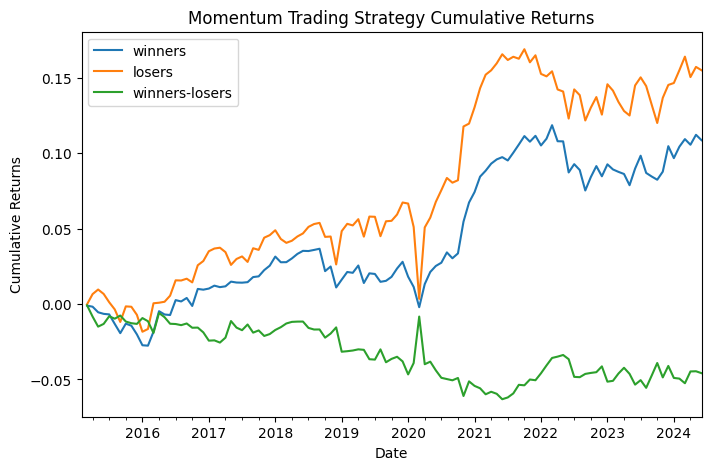

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

conn = sqlite3.connect("../studies/assetprice_prediction/sp500.sqlite")
sp500_data = pd.read_sql("SELECT * FROM stock_data", conn)
sp500_data_add = pd.read_sql("SELECT * FROM stock_data_additional_nyse", conn)

sp500_data.loc[:, "date"] = pd.to_datetime(sp500_data.date)
sp500_data = sp500_data.set_index("date")

sp500_data_add.loc[:, "date"] = pd.to_datetime(sp500_data_add.date)
sp500_data_add = sp500_data_add.set_index("date")

duplicated_tickers = list(set(sp500_data.ticker.unique()).intersection(set(sp500_data_add.ticker.unique())))
sp500_data_add = sp500_data_add[~sp500_data_add.ticker.isin(duplicated_tickers)]

study_data = pd.concat((sp500_data, sp500_data_add))
study_data = study_data.reset_index()

conn.close()

study_data_close = study_data.loc[:, ["date", "adjusted_close", "ticker"]]
study_data_close.set_index("date", inplace = True)
study_data_close_wide = study_data_close.pivot(columns = "ticker")
study_data_close_wide = study_data_close_wide.loc[:, "adjusted_close"]
monthly_returns = study_data_close_wide.resample("ME").last().pct_change(fill_method = None).iloc[1:, :]

remove_tickers_too_many_na = monthly_returns.columns[monthly_returns.isna().mean() > 0.90].tolist()
monthly_returns = monthly_returns.drop(remove_tickers_too_many_na, axis = 1)

remove_tickers_due_to_outliers = monthly_returns.mean().sort_values(ascending = False).index.tolist()[:19]
monthly_returns = monthly_returns.drop(remove_tickers_due_to_outliers, axis = 1)

n_assets = monthly_returns.shape[1]
top_n = int(0.1 * n_assets)
bottom_n = int(0.1 * n_assets)

ranked_momentum = monthly_returns.rank(axis = 1, method = "first", ascending = False)
winners = ranked_momentum.apply(lambda x: x <= top_n, axis=1)
losers = ranked_momentum.apply(lambda x: x >= (x.max() - bottom_n + 1), axis=1)
winners_returns = (winners.shift(1) * monthly_returns).mean(axis = 1)
losers_returns = (losers.shift(1) * monthly_returns).mean(axis = 1)
strategy_returns = (winners_returns - losers_returns)#.mean(axis=1)

cumulative_returns_winners = (1 + winners_returns).cumprod() - 1
cumulative_returns_losers = (1 + losers_returns).cumprod() - 1
cumulative_returns = (1 + strategy_returns).cumprod() - 1

# Plotting the cumulative returns
plt.figure(figsize = (8, 5))
cumulative_returns_winners.plot(label = "winners")
cumulative_returns_losers.plot(label = "losers")
cumulative_returns.plot(label = "winners-losers")
plt.legend()
plt.title('Momentum Trading Strategy Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

To get a feeling for the potential of the approach by Gu et al. (2018), we aim to mimic their proceeding with a very reduced data set. We calculate monthly values for the variables:

* the one-month momentum
* idiosyncratic volatility 
* the six month change in momentum 
* the maximum daily return 
* dollar trading volume 

Every month, these values are ranked in the cross-section of companies and ranks are normalized in the range $[-1, 1]$. We use a rolling window approach and always use the past 36 months to train a neural network for predicting the next month excess return. Hereby, every month is one batch which is used for gradient descent parameter updating. This model is used to make predictions for the next month. After this, we repeat this procedure starting at the next month. The final $R_{oos}^2$ is determined based upon all out-of-sample predictions.

We train a neural network with up to two hidden layers, including ReLu activation functions. The number of hidden neurons and the learning rate is determined by hyperparameter tuning and results in 50 hidden neurons for the first hidden layer and 30 hidden neurons the the second one. The learning rate is set to $0.001$. The final $R_{oos}^2$ is almost zero, yet, slightly negative. Below you can see the monthly values for the test period. They demonstrate, that our small model with a comparably short history is able to at least create good predictions for almost half of the months in the out of sample period. This is rather promising and may be further improved by including macro-economic or industry variables as the original study. 

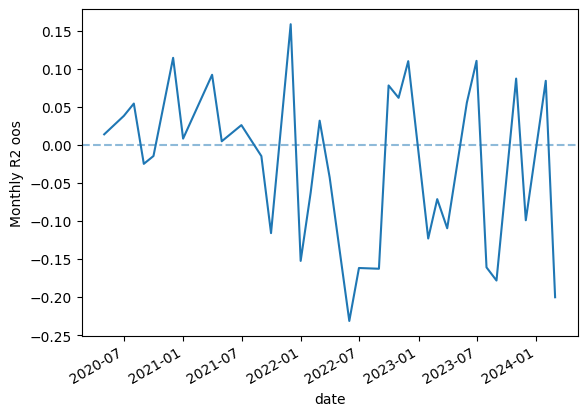

In [2]:
import pandas as pd
import matplotlib.pylab as plt

oos_r2_values = pd.read_csv("asset_price_predictions.csv")
oos_r2_values.index = pd.to_datetime(oos_r2_values.date)
oos_r2_values.drop(["date"], axis = 1, inplace = True)
oos_r2_values.plot(legend = False)
plt.ylabel("Monthly R2 oos")
plt.axhline(0, alpha = 0.5, linestyle = "--")
plt.show()

## Understanding and using PCA loadings for asset return data

In chapter 5, we learned that PCA builds PCS scores by multiplying the original (normalized) data $Z$

$$
Z = 
\begin{pmatrix}
z_{11} & ... & z_{1n} \\
\vdots & \ddots & \vdots \\
x_{T1} & ... & z_{tn} \\
\end{pmatrix}
$$

with up to $k$ principal component vectors $\mathbf{u}_l, l = 1, ..., k$ which results in a reduced dimensional representation of the data $V$. Note that we switched index $i$ with index $t$ in comparison to the last chapter as our application will consist of $T$ observations for $n$ companies. The columns of $V$ are principal component scores which are independent and exhibit a decreasing level of variation and level of explained variation for the original data. In detail, each PCA score is determined by building weighted sums of the original data and the PCA vector:

$$
v_{t1} = z_{t1} u_{1l} + ... + z_{tn} u_{nl}
$$

Realizations $\mathbf{z}_t$ are either mean centered or standardized. No matter which form of normalization we choose, values for $z_{tj} > 0$ imply an asset return which is above average for an asset and $z_{tj} < 0$ implies days with below average value development. For the weighted sum $v_{t1} > 0$ is a scenario which implies that assets with corresponding loadings $u_{jl} > 0$ exhibited a better (weighted) performance than the group of assets with loadings $u_{jl} < 0$. 

We use the same data as before, below you can see the signs of PCA vector loadings for the first five principal components. In our example almost all signs of the first principal components are negative. This makes sense as asset returns of stock market companies usually exhibit positive correlation. Consequently, the first principal component which is able to explain most of the variation in all asset returns rather captures similar developments among all companies. Note that the finding stays the same if all loadings would be positive. If all (or all we consider) are negative, then $v_{t1} < 0$ implies a weighted (by the absolute loading value) above average development for the majority of all companies.

The higher the loading in absolute values, the greater the impact of a company for the determination of the principal component score. This implies that the company is more important to explain the variation in the data overall and, thus, can be considered to play a more important role for systematic market movements. At the same time, this indicates that the company itself reacts more sensitive to systematic market movements. 

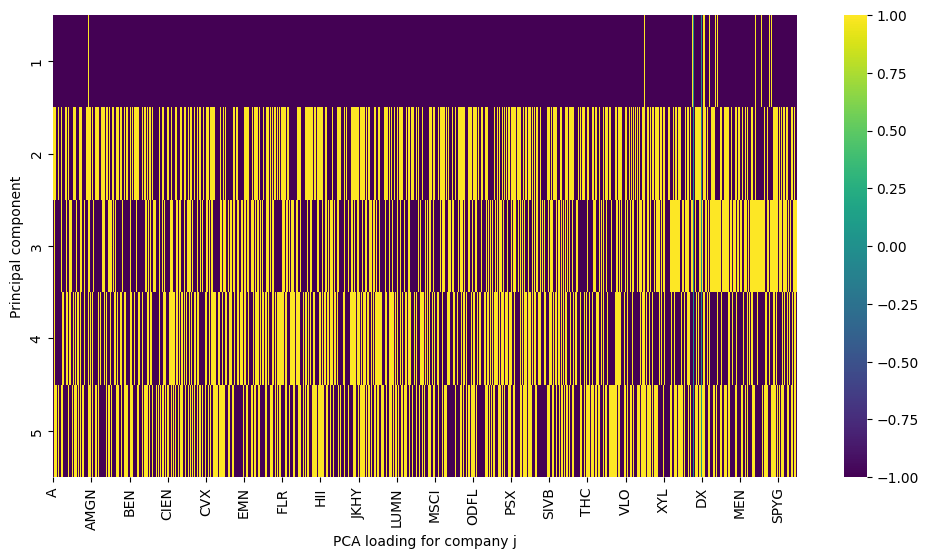

In [3]:
import sqlite3
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

conn = sqlite3.connect("../studies/assetprice_prediction/sp500.sqlite")
sp500_data = pd.read_sql("SELECT * FROM stock_data", conn)
sp500_data_add = pd.read_sql("SELECT * FROM stock_data_additional_nyse", conn)

sp500_data.loc[:, "date"] = pd.to_datetime(sp500_data.date)
sp500_data = sp500_data.set_index("date")

sp500_data_add.loc[:, "date"] = pd.to_datetime(sp500_data_add.date)
sp500_data_add = sp500_data_add.set_index("date")

duplicated_tickers = list(set(sp500_data.ticker.unique()).intersection(set(sp500_data_add.ticker.unique())))
sp500_data_add = sp500_data_add[~sp500_data_add.ticker.isin(duplicated_tickers)]

sp500_wide = sp500_data.loc[:, ["adjusted_close", "ticker"]].pivot(columns = "ticker")
sp500_returns = sp500_wide.pct_change(fill_method=None).iloc[1:, :]
sp500_returns = sp500_returns.loc[:, "adjusted_close"]

remove_tickers_too_many_na = sp500_returns.columns[sp500_returns.isna().mean() > 0.90].tolist()
sp500_returns = sp500_returns.drop(remove_tickers_too_many_na, axis = 1)
remove_tickers_due_to_outliers = sp500_returns.mean().sort_values(ascending = False).index.tolist()[:9]
sp500_returns = sp500_returns.drop(remove_tickers_due_to_outliers, axis = 1)

sp500_data_add_wide = sp500_data_add.loc[:, ["adjusted_close", "ticker"]].pivot(columns = "ticker")
sp500_data_add_wide = sp500_data_add_wide.replace(0, pd.NA)
sp500_returns_add = sp500_data_add_wide.pct_change(fill_method=None).iloc[1:, :]
sp500_returns_add = sp500_returns_add.loc[:, "adjusted_close"]

remove_tickers_too_many_na = sp500_returns_add.columns[sp500_returns_add.isna().mean() > 0.90].tolist()
sp500_returns_add = sp500_returns_add.drop(remove_tickers_too_many_na, axis = 1)

remove_tickers_due_to_outliers = sp500_returns_add.mean().sort_values(ascending = False).index.tolist()[:9]
sp500_returns_add = sp500_returns_add.drop(remove_tickers_due_to_outliers, axis = 1)

study_returns = sp500_returns.merge(sp500_returns_add, left_index=True, right_index=True)
study_returns = study_returns.astype(float)

estimation_data = study_returns.loc[pd.to_datetime("2015-01-01"):pd.to_datetime("2017-01-01")]

na_per_ticker = estimation_data.isna().sum()
available_tickers = na_per_ticker.index[na_per_ticker == 0].tolist()
estimation_data = estimation_data.loc[:, available_tickers]

scaler = StandardScaler()
scaler.fit(estimation_data)
estimation_data_s = scaler.transform(estimation_data)

pca = PCA(n_components=5, svd_solver = "full", random_state = 42)
pca.fit(estimation_data_s)

fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(np.sign(pca.components_), cmap = "viridis", ax = ax)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(["1", "2", "3", "4", "5"])
ax.set_ylabel("Principal component")
x_tick_idx = [i for i in range(0, estimation_data.shape[1], 40)]
ax.set_xticks(x_tick_idx)
ax.set_xticklabels([estimation_data.columns[i] for i in x_tick_idx])
ax.set_xlabel("PCA loading for company j")
plt.show()

Regarding all remaining principal components, we examine that the overall group of companies is split into two subgroups which behave systematically different to each other. In the example of the last chapter, we observed that the sign split the companies by industry (technology and banking in our example). Even though, we do not know according to which attributes the companies are split into the subgroups, this represents an analogical proceeding as for Fama-French alike factor models. For instance, size is a variable which is used to build subgroups of companies and examine the difference in their value development. Regarding the size of a company, one usually observes higher returns for the portfolio including smaller companies (this is often referred to as the size effect). The difference in the portfolio returns of small and large sized companies stem from systematic differences in the value development of these companies. Thus, the company loadings of a company for the second (or third, or fourth, ...) principal component may be good proxies for splitting the overall universe of assets in into subgroups which exhibit systematically different value behavior. If this is true, than the company specific loading vector $u_{j1}, ..., u_{jk}$ maybe useful to characterize the systematic behavior of companies. 

To examine this question, we are going to repeat the following proceeding over time:

1. Use daily data from the last $M$ months to estimate $k$ principal components (only for companies whose data is fully available during that time)
2. Form portfolios according to the principal component loadings:
    
    2.1 For the first component, exclude all companies which do exhibit the same sign as the majority of companies; rank all loadings and build a portfolio with top 10\% highest absolute loading values and the 10\% with the lowest absolute values
    2.2. For all remaining components, split the companies into two groups according to the sign of the component loading; build a portfolio with the 10\% highest loading values of positive loadings and one with the 10\% absolute highest loading values of negative loadings

3. For every portfolio, normalize the weights of each company such that they are proportional to the absolute loading 
4. Hold these portfolio for $H$ months.

For a better understanding, let us go through these steps for a given estimation period with $M = 24$ and $H=1$.

Step 1:

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


estimation_period_in_months = 24

month_starts = pd.date_range(start = "2015-01-01", end = "2024-06-01", freq = "MS")
month_ends = pd.date_range(start = "2015-01-01", end = "2024-07-01", freq = "ME")

t = estimation_period_in_months
estimation_data = study_returns.loc[month_starts[t-estimation_period_in_months]:month_starts[t]]
holding_data = study_returns.loc[month_starts[t]:month_ends[t]]

na_per_ticker = estimation_data.isna().sum()
available_tickers = na_per_ticker.index[na_per_ticker == 0].tolist()
estimation_data = estimation_data.loc[:, available_tickers]
n_assets = int(estimation_data.shape[1] * 0.1)

print("-"*100)
print("Estimation period, first observations for the first five companies:")
print("-"*100)
print(estimation_data.head().iloc[:, :5])
print("-"*100)
print("Holding1 period, first observations for the first five companies:")
print("-"*100)
print(holding_data.head().iloc[:, :5])

----------------------------------------------------------------------------------------------------
Estimation period, first observations for the first five companies:
----------------------------------------------------------------------------------------------------
ticker             A        AA       AAL       AAP      AAPL
date                                                        
2015-01-05 -0.018738 -0.057933 -0.000556 -0.013181 -0.028174
2015-01-06 -0.015578  0.007353 -0.015590 -0.000703  0.000097
2015-01-07  0.013272  0.025880 -0.000565  0.021488  0.014019
2015-01-08  0.029976  0.028459  0.012260  0.008766  0.038425
2015-01-09 -0.007336  0.013206 -0.030563 -0.005089  0.001069
----------------------------------------------------------------------------------------------------
Holding1 period, first observations for the first five companies:
----------------------------------------------------------------------------------------------------
ticker             A        AA     

Step 2.1:

In [5]:
scaler = StandardScaler()
scaler.fit(estimation_data)
estimation_data_s = scaler.transform(estimation_data)

pca = PCA(n_components=3, svd_solver = "full", random_state = 42)
pca.fit(estimation_data_s)

pca_one_df = pd.DataFrame({"ticker": available_tickers, "pca_1": pca.components_[0, :]})
pca_one_df.set_index("ticker", inplace = True)

average_sign_pca_one = np.sign(pca_one_df.pca_1).mean()
if average_sign_pca_one > 0:
    pca_one_ranks = pca_one_df[pca_one_df.pca_1 > 0].abs().rank(method = "first")    
else:
    pca_one_ranks = pca_one_df[pca_one_df.pca_1 < 0].abs().rank(method = "first")

low_first_pca_loading_pf_tickers = pca_one_ranks.index[pca_one_ranks.pca_1 <= n_assets].tolist()
high_first_pca_loading_pf_tickers = pca_one_ranks.index[pca_one_ranks.pca_1 >= (pca_one_ranks.pca_1.max() - n_assets + 1)].tolist()
low_first_pca_weights = pca_one_df.loc[low_first_pca_loading_pf_tickers].abs() / pca_one_df.loc[low_first_pca_loading_pf_tickers].abs().sum()
low_first_pca_weights = low_first_pca_weights.pca_1.values
high_first_pca_weights = pca_one_df.loc[high_first_pca_loading_pf_tickers].abs() / pca_one_df.loc[high_first_pca_loading_pf_tickers].abs().sum()
high_first_pca_weights = high_first_pca_weights.pca_1.values

low_first_pca_holding_returns_tmp = (holding_data.loc[:, low_first_pca_loading_pf_tickers] * low_first_pca_weights).sum(axis = 1)
high_first_pca_holding_returns_tmp = (holding_data.loc[:, high_first_pca_loading_pf_tickers] * high_first_pca_weights).sum(axis = 1)

print(f"Companies in the portfolio with lowest absolute values of the first component: {low_first_pca_loading_pf_tickers}")
print(f"Corresponding loadings of the first principal component: {pca_one_df.loc[low_first_pca_loading_pf_tickers].pca_1.round(4).values.tolist()}")
print(f"Corresponding portfolio weights: {low_first_pca_weights.round(4).tolist()}")
print(f"Companies in the portfolio with highest absolute values of the first component: {high_first_pca_loading_pf_tickers}")
print(f"Corresponding loadings of the first principal component: {pca_one_df.loc[high_first_pca_loading_pf_tickers].pca_1.round(4).values.tolist()}")
print(f"Corresponding portfolio weights: {high_first_pca_weights.round(4).tolist()}")

Companies in the portfolio with lowest absolute values of the first component: ['ABMD', 'APOL', 'CBOE', 'CLF', 'CMG', 'CTX', 'CZR', 'DHR', 'DXC', 'ED', 'EIX', 'ENDP', 'ENPH', 'EVHC', 'KHC', 'KSS', 'LULU', 'NEM', 'O', 'ODP', 'RAD', 'RAI', 'SII', 'SO', 'TSG', 'TSN', 'TWTR', 'URBN', 'WFM', 'ABR-PB', 'AGO-P-E', 'AMH-PC', 'BAC-P-E', 'BML-PL', 'BOIL', 'C-P-L', 'CVUA', 'CWEI', 'ENZ', 'EUO', 'FSCE', 'FSLF', 'GAM-P-B', 'GDXJ', 'GFY', 'GS-PC', 'GS-PI', 'GST', 'JPM-P-E', 'JPM-PE', 'LEO', 'MEN', 'MH-P-A', 'NM', 'NMZ', 'NXC', 'OFC-P-L', 'P', 'PAI', 'PCG-P-C', 'PGD', 'PMO', 'PNC-P-Q', 'RF-P-A', 'SBI', 'SCE-P-H', 'SCPX', 'SGY', 'SIRE', 'STAR-P-E', 'TCO-P-J', 'TNP-PB', 'TRNO-PA', 'VBF', 'VEC', 'VNO-P-I', 'WFC-P-R', 'XPL']
Corresponding loadings of the first principal component: [-0.0191, -0.0146, -0.0193, -0.0177, -0.0167, -0.0191, -0.0158, -0.014, -0.016, -0.0154, -0.0206, -0.0206, -0.0196, -0.0211, -0.0193, -0.02, -0.0211, -0.0086, -0.0203, -0.0212, -0.0122, -0.0209, -0.0169, -0.0201, -0.0179, -0.01

Step 2.2:

In [6]:
# pca 2
pca_two_df = pd.DataFrame({"ticker": available_tickers, "pca_2": pca.components_[1, :]})
pca_two_df.set_index("ticker", inplace = True)

pca_two_positive_loadings = pca_two_df[pca_two_df.pca_2 > 0]
pca_two_positive_loadings_pf_tickers = pca_two_positive_loadings.index[(pca_two_positive_loadings.rank(method = "first", ascending=False) <= n_assets).pca_2].tolist()
pca_two_positive_loadings_pf_weights = pca_two_positive_loadings.loc[pca_two_positive_loadings_pf_tickers].abs() / pca_two_positive_loadings.loc[pca_two_positive_loadings_pf_tickers].abs().sum()
pca_two_positive_loadings_pf_weights = pca_two_positive_loadings_pf_weights.pca_2.values

pca_two_negative_loadings = pca_two_df[pca_two_df.pca_2 < 0]
pca_two_negative_loadings_pf_tickers = pca_two_negative_loadings.index[(pca_two_negative_loadings.rank(method = "first") <= n_assets).pca_2].tolist()
pca_two_negative_loadings_pf_weights = pca_two_negative_loadings.loc[pca_two_negative_loadings_pf_tickers].abs() / pca_two_negative_loadings.loc[pca_two_negative_loadings_pf_tickers].abs().sum()
pca_two_negative_loadings_pf_weights = pca_two_negative_loadings_pf_weights.pca_2.values

pca_two_positive_pf_returns_tmp = (holding_data.loc[:, pca_two_positive_loadings_pf_tickers] * pca_two_positive_loadings_pf_weights).sum(axis = 1)
pca_two_negative_pf_returns_tmp = (holding_data.loc[:, pca_two_negative_loadings_pf_tickers] * pca_two_negative_loadings_pf_weights).sum(axis = 1)

print(f"Companies in the portfolio for the second component with positive loadings: {pca_two_positive_loadings_pf_tickers}")
print(f"Corresponding loadings of the second principal component: {pca_two_positive_loadings.loc[pca_two_positive_loadings_pf_tickers].pca_2.round(4).values.tolist()}")
print(f"Corresponding portfolio weights: {pca_two_positive_loadings_pf_weights.round(4).tolist()}")
print(f"Companies in the portfolio for the second component with negative loadings: {pca_two_negative_loadings_pf_tickers}")
print(f"Corresponding loadings of the second principal component: {pca_two_negative_loadings.loc[pca_two_negative_loadings_pf_tickers].pca_2.round(4).values.tolist()}")
print(f"Corresponding portfolio weights: {pca_two_negative_loadings_pf_weights.round(4).tolist()}")


Companies in the portfolio for the second component with positive loadings: ['AKS', 'AMG', 'AMP', 'APA', 'APC', 'ATI', 'BAC', 'BK', 'BKR', 'C', 'CAT', 'CF', 'CFG', 'CMA', 'CNX', 'COF', 'COP', 'CXO', 'DNR', 'DOV', 'DVN', 'EOG', 'ESV', 'ETFC', 'FANG', 'FCX', 'FHN', 'FITB', 'FLR', 'FLS', 'GNW', 'GS', 'HAL', 'HBAN', 'HES', 'HP', 'ITT', 'JOY', 'KEY', 'LNC', 'LYB', 'MET', 'MOS', 'MRO', 'MS', 'MUR', 'NAVI', 'NBL', 'NBR', 'NOV', 'PNC', 'PRU', 'QEP', 'RDC', 'RF', 'RIG', 'RJF', 'RRC', 'SCHW', 'SIVB', 'SLB', 'SLM', 'SWN', 'TFC', 'TRGP', 'UNM', 'URI', 'USL', 'WPX', 'XEC', 'ZION', 'CWEI', 'GST', 'HLX', 'OIH', 'SM', 'VDE', 'WBS']
Corresponding loadings of the second principal component: [0.045, 0.0427, 0.0457, 0.0535, 0.0499, 0.0459, 0.0598, 0.0418, 0.0449, 0.0474, 0.0471, 0.0451, 0.0595, 0.0594, 0.0454, 0.0456, 0.0523, 0.0442, 0.0619, 0.0417, 0.0533, 0.0424, 0.0665, 0.0497, 0.0417, 0.0479, 0.0526, 0.055, 0.042, 0.0582, 0.0504, 0.0439, 0.05, 0.0515, 0.0529, 0.0606, 0.0531, 0.0479, 0.0507, 0.0565, 0.

This is repeated for as many principal components as desired. Portfolio returns are determined by multiplying the weights from above the daily returns for the next month.

In [7]:
holding_returns = pd.concat((low_first_pca_holding_returns_tmp, high_first_pca_holding_returns_tmp, pca_two_negative_pf_returns_tmp, pca_two_positive_pf_returns_tmp), axis =  1)
holding_returns.columns = ["Low_Fst_PCA", "High_Fst_PCA", "Negative_Snd_PCA", "Positive_Snd_PCA"]
holding_returns

,Low_Fst_PCA,High_Fst_PCA,Negative_Snd_PCA,Positive_Snd_PCA
date,,,,
2017-01-03,0.007540,0.009037,-0.000464,0.013535
2017-01-04,0.013954,0.011350,0.007952,0.016343
2017-01-05,-0.004757,-0.006251,0.003637,-0.005183
2017-01-06,-0.003724,0.004244,-0.000126,0.003807
2017-01-09,-0.004938,-0.008358,-0.011069,-0.015917
2017-01-10,0.002591,0.002859,-0.006720,0.002897
2017-01-11,0.006025,0.006448,0.000805,0.011445
2017-01-12,-0.003364,-0.004242,0.003356,-0.009581
2017-01-13,0.003310,0.004410,-0.002212,-0.000363


**Results for a rolling window approach**

The procedure from above is now repeated over the time period between 2015 and 2024 using three principal components. With an estimation period of 24 months, the first portfolio returns start in the beginning of 2017. Below we see the aggregated performance measured by the mean returns, the standard deviation, and the ratio of the mean and standard deviation.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

estimation_period_in_months = 24

month_starts = pd.date_range(start = "2015-01-01", end = "2024-06-01", freq = "MS")
month_ends = pd.date_range(start = "2015-01-01", end = "2024-07-01", freq = "ME")

tickers_in_portfolio_pca_low = pd.DataFrame(data = False, index = month_starts[estimation_period_in_months:], columns = study_returns.columns.tolist())
tickers_in_portfolio_pca_high = pd.DataFrame(data = False, index = month_starts[estimation_period_in_months:], columns = study_returns.columns.tolist())

tickers_in_portfolio_pca_two_positive = pd.DataFrame(data = False, index = month_starts[estimation_period_in_months:], columns = study_returns.columns.tolist())
tickers_in_portfolio_pca_two_negative = pd.DataFrame(data = False, index = month_starts[estimation_period_in_months:], columns = study_returns.columns.tolist())

tickers_in_portfolio_pca_three_positive = pd.DataFrame(data = False, index = month_starts[estimation_period_in_months:], columns = study_returns.columns.tolist())
tickers_in_portfolio_pca_three_negative = pd.DataFrame(data = False, index = month_starts[estimation_period_in_months:], columns = study_returns.columns.tolist())

for t in range(estimation_period_in_months, len(month_starts), 1):
    estimation_data = study_returns.loc[month_starts[t-estimation_period_in_months]:month_starts[t]]
    holding_data = study_returns.loc[month_starts[t]:month_ends[t]]

    na_per_ticker = estimation_data.isna().sum()
    available_tickers = na_per_ticker.index[na_per_ticker == 0].tolist()
    estimation_data = estimation_data.loc[:, available_tickers]
    n_assets = int(estimation_data.shape[1] * 0.1)

    scaler = StandardScaler()
    scaler.fit(estimation_data)
    estimation_data_s = scaler.transform(estimation_data)

    pca = PCA(n_components=10, svd_solver = "full", random_state = 42)
    pca.fit(estimation_data_s)

    pca_one_df = pd.DataFrame({"ticker": available_tickers, "pca_1": pca.components_[0, :]})
    pca_one_df.set_index("ticker", inplace = True)

    average_sign_pca_one = np.sign(pca_one_df.pca_1).mean()
    if average_sign_pca_one > 0:
        pca_one_ranks = pca_one_df[pca_one_df.pca_1 > 0].abs().rank(method = "first")    
    else:
        pca_one_ranks = pca_one_df[pca_one_df.pca_1 < 0].abs().rank(method = "first")

    low_first_pca_loading_pf_tickers = pca_one_ranks.index[pca_one_ranks.pca_1 <= n_assets].tolist()
    tickers_in_portfolio_pca_low.loc[month_starts[t], low_first_pca_loading_pf_tickers] = True
    high_first_pca_loading_pf_tickers = pca_one_ranks.index[pca_one_ranks.pca_1 >= (pca_one_ranks.pca_1.max() - n_assets + 1)].tolist()
    tickers_in_portfolio_pca_high.loc[month_starts[t], high_first_pca_loading_pf_tickers] = True

    low_first_pca_weights = pca_one_df.loc[low_first_pca_loading_pf_tickers].abs() / pca_one_df.loc[low_first_pca_loading_pf_tickers].abs().sum()
    low_first_pca_weights = low_first_pca_weights.pca_1.values
    high_first_pca_weights = pca_one_df.loc[high_first_pca_loading_pf_tickers].abs() / pca_one_df.loc[high_first_pca_loading_pf_tickers].abs().sum()
    high_first_pca_weights = high_first_pca_weights.pca_1.values

    low_first_pca_holding_returns_tmp = (holding_data.loc[:, low_first_pca_loading_pf_tickers] * low_first_pca_weights).sum(axis = 1)
    high_first_pca_holding_returns_tmp = (holding_data.loc[:, high_first_pca_loading_pf_tickers] * high_first_pca_weights).sum(axis = 1)

    # pca 2
    pca_two_df = pd.DataFrame({"ticker": available_tickers, "pca_2": pca.components_[1, :]})
    pca_two_df.set_index("ticker", inplace = True)

    pca_two_positive_loadings = pca_two_df[pca_two_df.pca_2 > 0]
    pca_two_positive_loadings_pf_tickers = pca_two_positive_loadings.index[(pca_two_positive_loadings.rank(method = "first", ascending=False) <= n_assets).pca_2].tolist()
    tickers_in_portfolio_pca_two_positive.loc[month_starts[t], pca_two_positive_loadings_pf_tickers] = True
    pca_two_positive_loadings_pf_weights = pca_two_positive_loadings.loc[pca_two_positive_loadings_pf_tickers].abs() / pca_two_positive_loadings.loc[pca_two_positive_loadings_pf_tickers].abs().sum()
    pca_two_positive_loadings_pf_weights = pca_two_positive_loadings_pf_weights.pca_2.values

    pca_two_negative_loadings = pca_two_df[pca_two_df.pca_2 < 0]
    pca_two_negative_loadings_pf_tickers = pca_two_negative_loadings.index[(pca_two_negative_loadings.rank(method = "first") <= n_assets).pca_2].tolist()
    tickers_in_portfolio_pca_two_negative.loc[month_starts[t], pca_two_negative_loadings_pf_tickers] = True
    pca_two_negative_loadings_pf_weights = pca_two_negative_loadings.loc[pca_two_negative_loadings_pf_tickers].abs() / pca_two_negative_loadings.loc[pca_two_negative_loadings_pf_tickers].abs().sum()
    pca_two_negative_loadings_pf_weights = pca_two_negative_loadings_pf_weights.pca_2.values
    
    pca_two_positive_pf_returns_tmp = (holding_data.loc[:, pca_two_positive_loadings_pf_tickers] * pca_two_positive_loadings_pf_weights).sum(axis = 1)
    pca_two_negative_pf_returns_tmp = (holding_data.loc[:, pca_two_negative_loadings_pf_tickers] * pca_two_negative_loadings_pf_weights).sum(axis = 1)

    # pca 3
    pca_three_df = pd.DataFrame({"ticker": available_tickers, "pca_3": pca.components_[2, :]})
    pca_three_df.set_index("ticker", inplace = True)

    pca_three_positive_loadings = pca_three_df[pca_three_df.pca_3 > 0]
    pca_three_positive_loadings_pf_tickers = pca_three_positive_loadings.index[(pca_three_positive_loadings.rank(method = "first", ascending=False) <= n_assets).pca_3].tolist()
    tickers_in_portfolio_pca_three_positive.loc[month_starts[t], pca_three_positive_loadings_pf_tickers] = True
    pca_three_positive_loadings_pf_weights = pca_three_positive_loadings.loc[pca_three_positive_loadings_pf_tickers].abs() / pca_three_positive_loadings.loc[pca_three_positive_loadings_pf_tickers].abs().sum()
    pca_three_positive_loadings_pf_weights = pca_three_positive_loadings_pf_weights.pca_3.values

    pca_three_negative_loadings = pca_three_df[pca_three_df.pca_3 < 0]
    pca_three_negative_loadings_pf_tickers = pca_three_negative_loadings.index[(pca_three_negative_loadings.rank(method = "first") <= n_assets).pca_3].tolist()
    tickers_in_portfolio_pca_three_negative.loc[month_starts[t], pca_three_negative_loadings_pf_tickers] = True
    pca_three_negative_loadings_pf_weights = pca_three_negative_loadings.loc[pca_three_negative_loadings_pf_tickers].abs() / pca_three_negative_loadings.loc[pca_three_negative_loadings_pf_tickers].abs().sum()
    pca_three_negative_loadings_pf_weights = pca_three_negative_loadings_pf_weights.pca_3.values

    pca_three_positive_pf_returns_tmp = (holding_data.loc[:, pca_three_positive_loadings_pf_tickers] * pca_three_positive_loadings_pf_weights).sum(axis = 1)
    pca_three_negative_pf_returns_tmp = (holding_data.loc[:, pca_three_negative_loadings_pf_tickers] * pca_three_negative_loadings_pf_weights).sum(axis = 1)
    

    if t == estimation_period_in_months:
        low_first_pca_holding_returns = low_first_pca_holding_returns_tmp.copy()
        high_first_pca_holding_returns = high_first_pca_holding_returns_tmp.copy()

        pca_two_positive_pf_returns = pca_two_positive_pf_returns_tmp.copy()
        pca_two_negative_pf_returns = pca_two_negative_pf_returns_tmp.copy()

        pca_three_positive_pf_returns = pca_three_positive_pf_returns_tmp.copy()
        pca_three_negative_pf_returns = pca_three_negative_pf_returns_tmp.copy()
    else:
        low_first_pca_holding_returns = pd.concat((low_first_pca_holding_returns, low_first_pca_holding_returns_tmp))
        high_first_pca_holding_returns = pd.concat((high_first_pca_holding_returns, high_first_pca_holding_returns_tmp))

        pca_two_positive_pf_returns = pd.concat((pca_two_positive_pf_returns, pca_two_positive_pf_returns_tmp))
        pca_two_negative_pf_returns = pd.concat((pca_two_negative_pf_returns, pca_two_negative_pf_returns_tmp))

        pca_three_positive_pf_returns = pd.concat((pca_three_positive_pf_returns, pca_three_positive_pf_returns_tmp))
        pca_three_negative_pf_returns = pd.concat((pca_three_negative_pf_returns, pca_three_negative_pf_returns_tmp))

buy_and_hold_returns = study_returns.loc[month_starts[estimation_period_in_months]:].mean(axis = 1)

strategy_returns = pd.DataFrame({
    "Buy and hold": buy_and_hold_returns, 
    "High_PCA1": high_first_pca_holding_returns,
    "Low_PCA1": low_first_pca_holding_returns,
    "Positive_PCA2": pca_two_positive_pf_returns,
    "Negative_PCA2": pca_two_negative_pf_returns,
    "Positive_PCA3": pca_three_positive_pf_returns,
    "Negative_PCA3": pca_three_negative_pf_returns
    })

strategy_returns.loc[:, "PCA_1_LS"] = strategy_returns.loc[:, "High_PCA1"] - strategy_returns.loc[:, "Low_PCA1"]
strategy_returns.loc[:, "PCA_2_LS"] = strategy_returns.loc[:, "Negative_PCA2"] - strategy_returns.loc[:, "Positive_PCA2"]
strategy_returns.loc[:, "PCA_3_LS"] = strategy_returns.loc[:, "Negative_PCA3"] - strategy_returns.loc[:, "Positive_PCA3"]

strategy_results = pd.concat((strategy_returns.mean(), strategy_returns.std(), strategy_returns.mean() / strategy_returns.std()), axis = 1)
strategy_results.columns = ["mean", "std", "mean / std"]
strategy_results.round(4)

,mean,std,mean / std
Buy and hold,0.0005,0.0122,0.0433
High_PCA1,0.0007,0.0154,0.0437
Low_PCA1,0.0005,0.0110,0.0470
Positive_PCA2,0.0001,0.0162,0.0033
Negative_PCA2,0.0009,0.0185,0.0474
Positive_PCA3,0.0002,0.0166,0.0129
Negative_PCA3,0.0008,0.0147,0.0513
PCA_1_LS,0.0002,0.0110,0.0143
PCA_2_LS,0.0008,0.0201,0.0410
PCA_3_LS,0.0005,0.0162,0.0332


The results show that companies which react more sensitive towards the overall market (measures by the loading of the first principal component) exhibit a higher return but also face higher risk. This is analogue to the CAPM which states that the expected (excess) return of a company can be explained by the sensitivity towards the market portfolio. Notably, the creation of portfolios by the positive and negative loadings lead to portfolios with very different levels of profitability. In our example, the portfolios with negative component loadings have higher returns. In case of component two, higher returns are accompanied by higher risk. A very common approach in finance is to fictionally build long-short positions of portfolios which are build upon the same variable. In our setting, the "variable" is the loading of each principal component which is why we additionally build long-short portfolios per principal component. The output below also exhibits the development of cumulative returns for all portfolios.

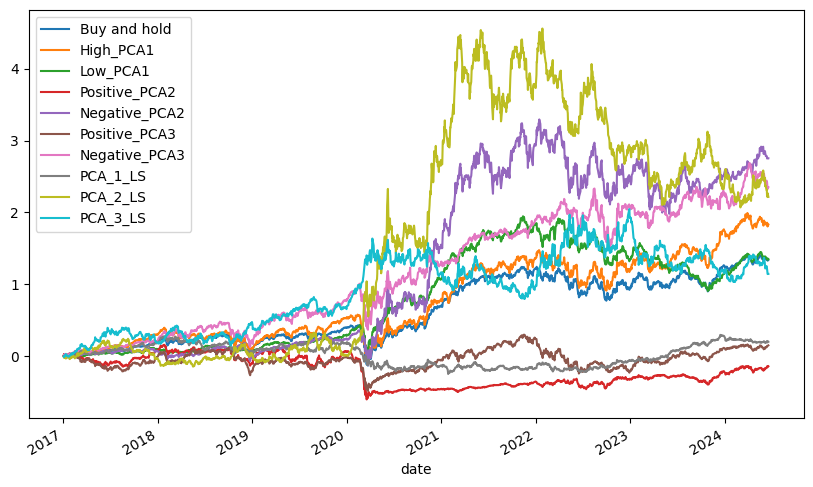

In [9]:
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(10, 6))
cumulative_returns = ((1 + strategy_returns).cumprod() - 1)
cumulative_returns.plot(ax = ax)
plt.show()

To examine if these portfolios often change their constituents, we take a look at the graphics below which highlight by color if a company is in the portfolio at that time or not. Visually, we can observe that all portfolios are rather stable over time and only slowly exchange their constituents. 

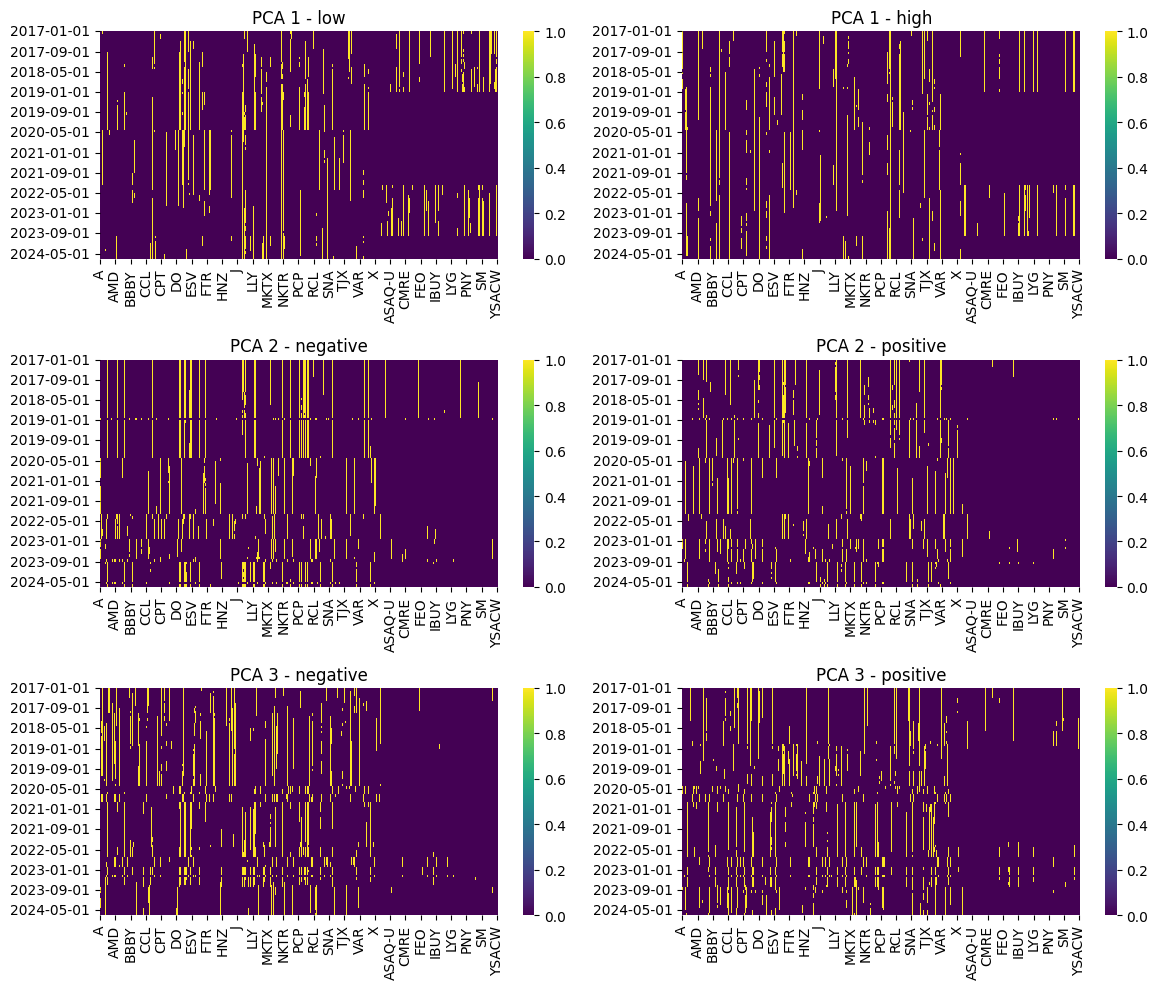

In [10]:
fig, axs = plt.subplots(3, 2, figsize = (12, 10))
sns.heatmap(np.where(tickers_in_portfolio_pca_low == True, 1, 0), cmap = "viridis", ax = axs[0, 0])
sns.heatmap(np.where(tickers_in_portfolio_pca_high == True, 1, 0), cmap = "viridis", ax = axs[0, 1])
sns.heatmap(np.where(tickers_in_portfolio_pca_two_negative == True, 1, 0), cmap = "viridis", ax = axs[1, 0])
sns.heatmap(np.where(tickers_in_portfolio_pca_two_positive == True, 1, 0), cmap = "viridis", ax = axs[1, 1])
sns.heatmap(np.where(tickers_in_portfolio_pca_three_negative == True, 1, 0), cmap = "viridis", ax = axs[2, 0])
sns.heatmap(np.where(tickers_in_portfolio_pca_three_positive == True, 1, 0), cmap = "viridis", ax = axs[2, 1])
x_tick_idx = [i for i in range(0, study_returns.shape[1], 40)]

axs[0, 0].set_title("PCA 1 - low")
axs[0, 1].set_title("PCA 1 - high")
axs[1, 0].set_title("PCA 2 - negative")
axs[1, 1].set_title("PCA 2 - positive")
axs[2, 0].set_title("PCA 3 - negative")
axs[2, 1].set_title("PCA 3 - positive")

for k in range(3):
    for l in range(2):
        axs[k, l].set_yticks([i for i, dt in enumerate(month_starts[estimation_period_in_months:]) if i % 8 == 0])
        axs[k, l].set_yticklabels([dt.date() for i, dt in enumerate(month_starts[estimation_period_in_months:]) if i % 8 == 0])
        axs[k, l].set_xticks(x_tick_idx)
        axs[k, l].set_xticklabels([study_returns.columns[i] for i in x_tick_idx])

fig.tight_layout()
plt.show()

In a next and last step of this analysis, we regress portfolio's excess returns of the long-shor portfolio upon the Fama-French factors. In comparison, we also conduct this regression with a naive buy and hold portfolio which invests into all assets the same amount of money. The buy and hold portfolio reacts according to its beta parameter estimates almost in line with the market and like a smaller value company. Interestingly, the market beta of the long-short portfolios which are build around the second and third principal component are slightly negative and closer towards zero. This shows that hedging the groups which are build by the signs of principal components works w.r.t the sensitivity towards systematic market movements. 

Moreover, at a significance level of 10\%, we find the risk adjusted performance to be different to zero for the portfolios of companies with positive loadings of principal component two and three. Furthermore, also the long-short portfolios of principal component two and three seem to exhibit risk-adjusted performance which can not be fully explained by market sensitivity, size and value effects. 


In [11]:
#from fda_utils.misc import get_ff_factors
import statsmodels.api as sm

ff = pd.read_csv("../data/ff_data.csv")
ff.index = pd.to_datetime(ff.date)
ff.drop(["date"], axis = 1, inplace = True)

regression_data = strategy_returns.merge(ff, left_index=True, right_index=True)

portfolios = ['Buy and hold', 'High_PCA1', 'Low_PCA1', 'Positive_PCA2', 'Negative_PCA2', 'Positive_PCA3', 'Negative_PCA3', "PCA_1_LS", "PCA_2_LS", "PCA_3_LS"] 

index_names = []
for name in portfolios:
    index_names.append((name, "estimates"))
    index_names.append((name, "p_value"))

parameter_estimates = pd.DataFrame(index = pd.MultiIndex.from_tuples(index_names), columns = ["alpha", "beta_m", "beta_smb", "beta_hml"])
for pf_name in portfolios:
    y = regression_data.loc[:, pf_name] - regression_data.loc[:, "rf"]
    X = regression_data.loc[:, ["Mkt-RF", "SMB", "HML"]]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit(cov_type = "HC3")
    parameter_estimates.loc[(pf_name, "estimates")] = results.params.values
    parameter_estimates.loc[(pf_name, "p_value")] = results.pvalues.values

parameter_estimates.round(4)

alpha    beta_m  beta_smb  beta_hml
Buy and hold  estimates  0.000071   0.92159   0.25897  0.307266
              p_value    0.207542       0.0       0.0       0.0
High_PCA1     estimates  0.000134  1.150078  0.113088  0.577135
              p_value    0.132407       0.0       0.0       0.0
Low_PCA1      estimates  0.000152  0.682292  0.259777  0.080291
              p_value    0.326194       0.0       0.0  0.000498
Positive_PCA2 estimates -0.000519  1.038134   0.01091  0.323957
              p_value    0.028789       0.0  0.880513       0.0
Negative_PCA2 estimates  0.000454  1.006439  0.382356  0.672203
              p_value    0.104505       0.0       0.0       0.0
Positive_PCA3 estimates -0.000409   1.08431  0.266986 -0.089409
              p_value    0.062293       0.0       0.0  0.016103
Negative_PCA3 estimates  0.000273  0.956621 -0.024046  0.268424
              p_value    0.182876       0.0  0.494493       0.0
PCA_1_LS      estimates -0.000089   0.46781 -0.146376  0.496946
              p_value    0.655117       0.0  0.000237       0.0
PCA_2_LS      estimates  0.000902 -0.031671  0.371759  0.348349
              p_value    0.055714  0.717789    0.0063  0.001132
PCA_3_LS      estimates  0.000611 -0.127665 -0.290719  0.357936
              p_value    0.096807  0.006967  0.000011       0.0

When doing regression analysis above it is more common to use monthly returns instead of daily returns. These are less noisy, however, due to the reduction in the data size statistical uncertainty is increased. In the cells below, we convert daily returns to log-returns, aggregate these to monthly log-returns and convert them back to monthly discrete returns. The first output exhibits mean, standard deviation and mean to standard deviation for monthly returns. The second output, the Fama-French regressions of the risk-adjusted performance for the principal component loading portfolios. Results partly differ, however, we still examine differences in the portfolios. As an exercise, try to interpret these results in more detail. 

In [12]:
monthly_strategy_returns = strategy_returns.apply(lambda x: np.log(1 + x)).resample("ME").sum()
monthly_strategy_returns = monthly_strategy_returns.apply(np.exp) - 1
monthly_strategy_returns.index = monthly_strategy_returns.index.strftime("%Y-%m")

monthly_strategy_results = pd.concat((monthly_strategy_returns.mean(), monthly_strategy_returns.std(), monthly_strategy_returns.mean() / monthly_strategy_returns.std()), axis = 1)
monthly_strategy_results.columns = ["mean", "std", "mean / std"]
monthly_strategy_results.round(4)

,mean,std,mean / std
Buy and hold,0.0110,0.0543,0.2018
High_PCA1,0.0135,0.0609,0.2210
Low_PCA1,0.0107,0.0483,0.2208
Positive_PCA2,0.0018,0.0794,0.0228
Negative_PCA2,0.0179,0.0830,0.2151
Positive_PCA3,0.0045,0.0762,0.0596
Negative_PCA3,0.0148,0.0504,0.2932
PCA_1_LS,0.0029,0.0415,0.0698
PCA_2_LS,0.0175,0.0994,0.1761
PCA_3_LS,0.0106,0.0659,0.1612


In [13]:
ff_monthly = pd.read_csv("../data/ff_monthly.csv")
ff_monthly.index = ff_monthly.date
ff_monthly.drop(["date"], axis = 1, inplace = True)

monthly_regression_data = monthly_strategy_returns.merge(ff_monthly, left_index=True, right_index=True)

index_names = []
for name in portfolios:
    index_names.append((name, "estimates"))
    index_names.append((name, "p_value"))

parameter_estimates = pd.DataFrame(index = pd.MultiIndex.from_tuples(index_names), columns = ["alpha", "beta_m", "beta_smb", "beta_hml"])
for pf_name in portfolios:
    y = monthly_regression_data.loc[:, pf_name] - monthly_regression_data.loc[:, "rf"]
    X = monthly_regression_data.loc[:, ["Mkt-RF", "SMB", "HML"]]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit(cov_type="HAC", cov_kwds={"maxlags": 6}) 
    parameter_estimates.loc[(pf_name, "estimates")] = results.params.values
    parameter_estimates.loc[(pf_name, "p_value")] = results.pvalues.values

parameter_estimates.round(4)

alpha    beta_m  beta_smb  beta_hml
Buy and hold  estimates  0.000923  0.996004  0.263844  0.295237
              p_value    0.301719       0.0       0.0       0.0
High_PCA1     estimates  0.002343  1.117456  0.076787  0.438687
              p_value    0.140535       0.0  0.268458       0.0
Low_PCA1      estimates   0.00306  0.720275  0.346073    0.0603
              p_value    0.438454       0.0  0.002659  0.542107
Positive_PCA2 estimates -0.009691  1.163879  0.149106  0.699541
              p_value    0.092404       0.0  0.496878  0.003255
Negative_PCA2 estimates  0.007912  1.074546  0.387754  0.404322
              p_value    0.139734       0.0  0.117431  0.065879
Positive_PCA3 estimates -0.007987  1.220097  0.647601  0.130128
              p_value    0.024506       0.0  0.000001  0.342062
Negative_PCA3 estimates  0.005658  0.815248  -0.26509  0.179325
              p_value    0.037814       0.0  0.060412  0.069914
PCA_1_LS      estimates -0.002124  0.398506 -0.253707  0.370557
              p_value    0.600679  0.000002  0.102287       0.0
PCA_2_LS      estimates  0.017914 -0.142529  0.207072 -0.345373
              p_value    0.115298  0.573346   0.64624  0.483973
PCA_3_LS      estimates  0.012741 -0.440779 -0.887311 -0.019303
              p_value    0.022729  0.000063  0.000041  0.936731

### Cluster portfolios by pca loadings

In the last analysis, we created portfolios which were selected according the the loadings of a single principal component. The idea was that for a principal component companies with different sign are likely to exhibit different systematic behavior. In the following analysis, we aim to construct portfolios according to the vector of loadings for $k$ principal components for each company. 

The cell below illustrates these vectors for a given estimation period and if we use the loadings of the first three principal components per company. Just regarding the sign of the loadings for the first five observations, we would group the companies "A" and "AAL" into one group, the companies "AAP" and "AAPL" and leave "AA" alone as its own group. Differences of the company loading vectors imply an overall different systematic behavior of these companies. 

To objectively group the companies according to their component loadings into a user-specified number of groups, we can make use of clustering, e.g., k-means clustering. 

In [14]:
from sklearn.preprocessing import StandardScaler

estimation_period_in_months = 24

month_starts = pd.date_range(start = "2015-01-01", end = "2024-06-01", freq = "MS")
month_ends = pd.date_range(start = "2015-01-01", end = "2024-07-01", freq = "ME")

t = 24
#for t in tqdm(range(estimation_period_in_months, len(month_starts), 1)):
estimation_data = study_returns.loc[month_starts[t-estimation_period_in_months]:month_starts[t]]
holding_data = study_returns.loc[month_starts[t]:month_ends[t]]

na_per_ticker = estimation_data.isna().sum()
available_tickers = na_per_ticker.index[na_per_ticker == 0].tolist()
estimation_data = estimation_data.loc[:, available_tickers]
holding_data = holding_data.loc[:, available_tickers]

scaler = StandardScaler()
scaler.fit(estimation_data)
estimation_data_s = scaler.transform(estimation_data)

n_components = 3
pca = PCA(n_components=n_components, svd_solver = "full", random_state = 42)
pca.fit(estimation_data_s)

pca_loadings_df = pd.DataFrame(pca.components_.transpose(), index = estimation_data.columns.tolist(), columns = [f"pca_loading_{i}" for i in range(n_components)])
pca_loadings_df.head()

,pca_loading_0,pca_loading_1,pca_loading_2
A,-0.050345,0.006911,-0.024857
AA,-0.033943,0.039440,0.050863
AAL,-0.034161,0.007631,-0.039854
AAP,-0.028500,-0.007573,-0.013412
AAPL,-0.036238,-0.004437,-0.022869


For a simpler visual illustration we restrict ourselves to the first two loadings per company. The left graphic in the figure below shows, how the companies would be split into four clusters when we set the number of clusters to four. As we want to hold companies in our loading portfolios which exhibit different systematic behavior, we further adjust the portfolio selection process. For every cluster, we only hold $n_{\text{assets}}$ which are selected by the highest silhouette score in their cluster. Companies in these portfolios can be seen in the right graphic of the figure below.

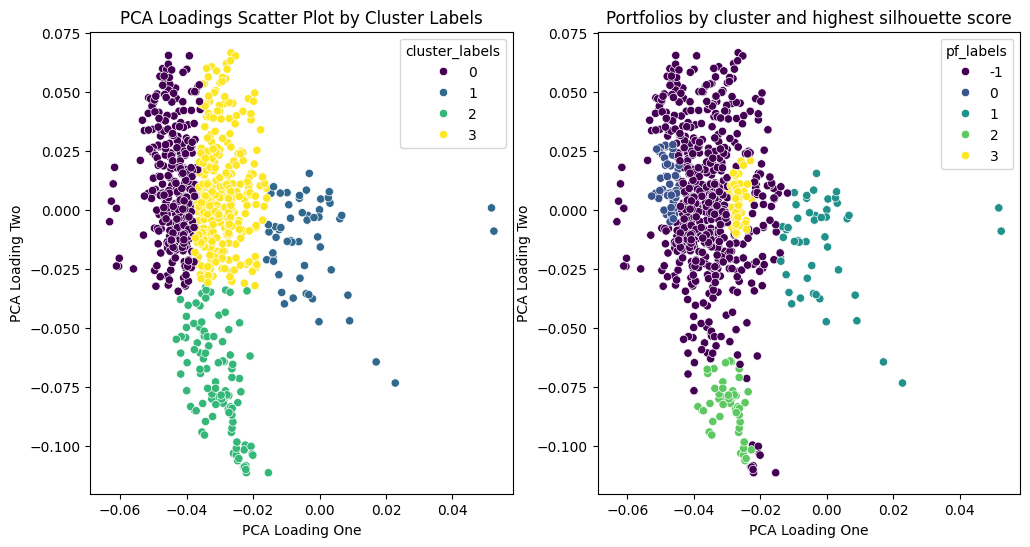

In [15]:
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import seaborn as sns

estimation_period_in_months = 24

month_starts = pd.date_range(start = "2015-01-01", end = "2024-06-01", freq = "MS")
month_ends = pd.date_range(start = "2015-01-01", end = "2024-07-01", freq = "ME")

t = 24
#for t in tqdm(range(estimation_period_in_months, len(month_starts), 1)):
estimation_data = study_returns.loc[month_starts[t-estimation_period_in_months]:month_starts[t]]
holding_data = study_returns.loc[month_starts[t]:month_ends[t]]

na_per_ticker = estimation_data.isna().sum()
available_tickers = na_per_ticker.index[na_per_ticker == 0].tolist()
estimation_data = estimation_data.loc[:, available_tickers]
holding_data = holding_data.loc[:, available_tickers]

scaler = StandardScaler()
scaler.fit(estimation_data)
estimation_data_s = scaler.transform(estimation_data)

pca = PCA(n_components=3, svd_solver = "full", random_state = 42)
pca.fit(estimation_data_s)

pca_loadings_df = pd.DataFrame(pca.components_.transpose()[:, :2], index = estimation_data.columns.tolist(), columns = ["pca_loading_one", "pca_loading_two"])

cluster_scaler = StandardScaler()
cluster_data = cluster_scaler.fit_transform(pca_loadings_df)

n_clusters = 4
n_companies_pf = 50
kmeans = KMeans(n_clusters=n_clusters, random_state = 42)
kmeans.fit(cluster_data)

pca_loadings_df.loc[:, "cluster_labels"] = kmeans.labels_
pca_loadings_df.loc[:, "silhouette_samples"] =  silhouette_samples(cluster_data, kmeans.labels_)
pca_loadings_df.loc[:, "pf_labels"] = -1

for i in range(n_clusters):
    pca_loadings_cluster = pca_loadings_df[pca_loadings_df.cluster_labels == i]
    pca_loadings_tickers = pca_loadings_cluster.index[pca_loadings_cluster.silhouette_samples.rank(method = "first", ascending=False) < n_companies_pf].tolist()
    pca_loadings_df.loc[pca_loadings_tickers, "pf_labels"] = i

# Create a scatter plot using matplotlib
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
sns.scatterplot(
    data=pca_loadings_df, 
    x='pca_loading_one', 
    y='pca_loading_two', 
    ax = axs[0],
    hue='cluster_labels', 
    palette='viridis', 
    legend='full'
)

sns.scatterplot(
    data=pca_loadings_df, 
    x='pca_loading_one', 
    y='pca_loading_two', 
    ax = axs[1],
    hue='pf_labels', 
    palette='viridis', 
    legend='full'
)

axs[0].set_xlabel('PCA Loading One')
axs[0].set_ylabel('PCA Loading Two')
axs[0].set_title('PCA Loadings Scatter Plot by Cluster Labels')

axs[1].set_xlabel('PCA Loading One')
axs[1].set_ylabel('PCA Loading Two')
axs[1].set_title('Portfolios by cluster and highest silhouette score')

plt.show()


Let us examine which portfolios are created if we conduct the following sorting mechanism over time:

1. Use daily data from the last $M$ months to estimate $k$ principal components (only for companies whose data is fully available during that time)
2. Sort all companies into $c$ clusters by using the principal component loadings per company. To ensure cluster consistency, only initialize the cluster centers for the first estimation period randomly and use the cluster centers of the last estimation as starting values for the current period afterwards. 
3. For each cluster select companies into the cluster portfolio, if $rg \left( S(i) \right) < n_{\text{assets}}$; if the number of companies is smaller than $n_{\text{assets}}$, use the full cluster.
4. Hold these portfolio with equal weights for $H$ months.

The cell below proceeds as described using $M = 24$, $k = 5$, $c = 4$ and $n_{\text{assets}} = 50$. 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples


estimation_period_in_months = 24

month_starts = pd.date_range(start = "2015-01-01", end = "2024-06-01", freq = "MS")
month_ends = pd.date_range(start = "2015-01-01", end = "2024-07-01", freq = "ME")

standardize_data = True
n_clusters = 4
n_companies_pf = 50

cluster_returns = pd.DataFrame(index = study_returns.loc[month_starts[estimation_period_in_months]:, ].index, columns = [f"cluster_pf_{i}" for i in range(n_clusters)])

for t in range(estimation_period_in_months, len(month_starts), 1):
    estimation_data = study_returns.loc[month_starts[t-estimation_period_in_months]:month_starts[t]]
    holding_data = study_returns.loc[month_starts[t]:month_ends[t]]

    na_per_ticker = estimation_data.isna().sum()
    available_tickers = na_per_ticker.index[na_per_ticker == 0].tolist()
    estimation_data = estimation_data.loc[:, available_tickers]
    holding_data = holding_data.loc[:, available_tickers]

    if standardize_data:
        scaler = StandardScaler()
        scaler.fit(estimation_data)
        estimation_data_s = scaler.transform(estimation_data)
    else:
        estimation_data_s = estimation_data - estimation_data.mean()

    n_components = 5
    pca = PCA(n_components=n_components, svd_solver = "full", random_state = 42)
    pca.fit(estimation_data_s)

    pca_loadings_df = pd.DataFrame(pca.components_.transpose(), index = estimation_data.columns.tolist(), columns = [f"pca_loadings{i}" for i in range(n_components)])

    cluster_scaler = StandardScaler()
    cluster_data = cluster_scaler.fit_transform(pca_loadings_df)


    if t == estimation_period_in_months:
        kmeans = KMeans(n_clusters=n_clusters, random_state = 42)
    else:
        cluster_center_init = kmeans.cluster_centers_
        kmeans = KMeans(n_clusters=n_clusters, init = cluster_center_init)
    kmeans.fit(cluster_data)

    pca_loadings_df.loc[:, "cluster_labels"] = kmeans.labels_
    pca_loadings_df.loc[:, "silhouette_samples"] =  silhouette_samples(cluster_data, kmeans.labels_)
    pca_loadings_df.loc[:, "pf_labels"] = -1

    n_companies_per_cluster = pca_loadings_df.cluster_labels.value_counts()
    pf_sizes = {}
    for i in range(n_clusters):
        cluster_pf_size = min(n_companies_per_cluster.loc[i], n_companies_pf)
        pf_sizes[i] = cluster_pf_size
        #if cluster_pf_size < n_companies_pf:
            #print(f"Number of companies in portfolio for cluster {i} from {estimation_data.index[0]} to {estimation_data.index[-1]} is {cluster_pf_size} instead of {n_companies_pf}")

    for i in range(n_clusters):
        pca_loadings_cluster = pca_loadings_df[pca_loadings_df.cluster_labels == i]
        pca_loadings_tickers = pca_loadings_cluster.index[pca_loadings_cluster.silhouette_samples.rank(method = "first", ascending=False) <= pf_sizes[i]].tolist()
        pca_loadings_df.loc[pca_loadings_tickers, "pf_labels"] = i
        cluster_returns.loc[holding_data.index, f"cluster_pf_{i}"] = holding_data.loc[:, pca_loadings_df[pca_loadings_df.pf_labels == i].index.tolist()].mean(axis = 1)


Number of companies in portfolio for cluster 2 from 2017-01-03 00:00:00 to 2018-12-31 00:00:00 is 44 instead of 50
Number of companies in portfolio for cluster 2 from 2017-02-01 00:00:00 to 2019-02-01 00:00:00 is 43 instead of 50
Number of companies in portfolio for cluster 2 from 2017-03-01 00:00:00 to 2019-03-01 00:00:00 is 42 instead of 50
Number of companies in portfolio for cluster 3 from 2017-08-01 00:00:00 to 2019-08-01 00:00:00 is 41 instead of 50
Number of companies in portfolio for cluster 3 from 2017-09-01 00:00:00 to 2019-08-30 00:00:00 is 41 instead of 50
Number of companies in portfolio for cluster 3 from 2017-10-02 00:00:00 to 2019-10-01 00:00:00 is 40 instead of 50
Number of companies in portfolio for cluster 3 from 2017-11-01 00:00:00 to 2019-11-01 00:00:00 is 39 instead of 50
Number of companies in portfolio for cluster 3 from 2017-12-01 00:00:00 to 2019-11-29 00:00:00 is 39 instead of 50
Number of companies in portfolio for cluster 3 from 2018-01-02 00:00:00 to 2019-

The cell below illustrates that the portfolio exhibit differences for the cluster portfolios. 

In [17]:
strategy_returns = pd.concat((buy_and_hold_returns, cluster_returns), axis = 1)
strategy_returns = strategy_returns.rename({0: "Buy and hold"}, axis = 1)
strategy_returns = strategy_returns.astype(float)

monthly_strategy_returns = strategy_returns.apply(lambda x: np.log(1 + x)).resample("ME").sum()
monthly_strategy_returns = monthly_strategy_returns.apply(np.exp) - 1
monthly_strategy_returns.index = monthly_strategy_returns.index.strftime("%Y-%m")

monthly_strategy_results = pd.concat((monthly_strategy_returns.mean(), monthly_strategy_returns.std(), monthly_strategy_returns.mean() / monthly_strategy_returns.std()), axis = 1)
monthly_strategy_results.columns = ["mean", "std", "mean / std"]
monthly_strategy_results.round(4)

,mean,std,mean / std
Buy and hold,0.0110,0.0543,0.2018
cluster_pf_0,0.0157,0.0679,0.2319
cluster_pf_1,0.0185,0.0796,0.2327
cluster_pf_2,0.0026,0.0718,0.0360
cluster_pf_3,0.0062,0.0831,0.0745


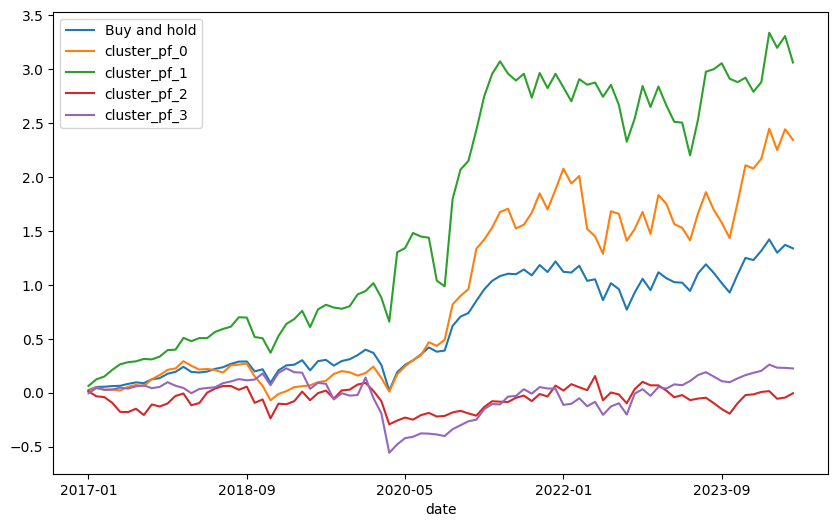

In [18]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(figsize = (10, 6))
((1 + monthly_strategy_returns).cumprod() - 1).plot(ax = axs)
plt.show()

Taking a look at the Fama-French regressions (already for monthly data) for each portfolio in the cell below, we observe a risk-adjusted performance for cluster portfolio one which can not be fully explained by the Fama-French risk factors. According to the estimated beta coefficients, this portfolio reacts sensitive to the market and behaves like smaller value companies. 

W.r.t the profitability of this portfolio, these results are quite promising. They exhibit that it is possible to create a portfolio for which we get an over-compensation for bearing systematic market risk. However, a few questions of this approach remain unanswered:

* What are the best choices regarding $k, c$ and $n_{\text{assets}}$?
* How can we make sure that companies are selected consistently, given the original random initialization of the clustering algorithm?
* Which companies are selected in the most profitable clusters?

We are not going to answer these questions here, but they highlight a problem which is often met, when working with machine learning algorithms - random initialization and explainability.

In [19]:
ff_monthly = pd.read_csv("../data/ff_monthly.csv")
ff_monthly.index = ff_monthly.date
ff_monthly.drop(["date"], axis = 1, inplace = True)

monthly_regression_data = monthly_strategy_returns.merge(ff_monthly, left_index=True, right_index=True)
portfolios = monthly_strategy_returns.columns.tolist()

index_names = []
for name in portfolios:
    index_names.append((name, "estimates"))
    index_names.append((name, "p_value"))

parameter_estimates = pd.DataFrame(index = pd.MultiIndex.from_tuples(index_names), columns = ["alpha", "beta_m", "beta_smb", "beta_hml"])
for pf_name in portfolios:
    y = monthly_regression_data.loc[:, pf_name] - monthly_regression_data.loc[:, "rf"]
    X = monthly_regression_data.loc[:, ["Mkt-RF", "SMB", "HML"]]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit(cov_type="HAC", cov_kwds={"maxlags": 6}) 
    parameter_estimates.loc[(pf_name, "estimates")] = results.params.values
    parameter_estimates.loc[(pf_name, "p_value")] = results.pvalues.values
    
parameter_estimates.round(4)

alpha    beta_m  beta_smb  beta_hml
Buy and hold estimates  0.000923  0.996004  0.263844  0.295237
             p_value    0.301719       0.0       0.0       0.0
cluster_pf_0 estimates  0.006161  0.980574  0.381065  0.321404
             p_value    0.136636       0.0  0.039513  0.094571
cluster_pf_1 estimates  0.007925  1.115315  0.279374   0.25461
             p_value    0.061722       0.0  0.122779   0.11641
cluster_pf_2 estimates -0.007629  1.016168  0.031956  0.674135
             p_value    0.093524       0.0  0.884581       0.0
cluster_pf_3 estimates -0.004908  1.199243  0.297735  0.543843
             p_value    0.378884       0.0   0.20327  0.056605

### Cluster portfolios by Fama-French factor exposure

When discussing factor models in the dependence chapter, we already learned about Fama-French's factor model and how the corresponding beta parameters for the companies can be used to determine pairwise dependencies among companies. Furthermore, we know that companies with similar beta parameters tend to behave systematically similar w.r.t their value development. Thus, we aim to cluster companies according to their factor exposures (the beta parameters) and analyze if groups with different systematic behavior exhibit different development patterns over time. We proceed as follows:

1. Use daily data from the last $M$ months to estimate factor exposure for every company to Fama-French factors $\mathbf{\beta}_i$ 
2. Sort all companies into $c$ clusters by using the beta vectors per company. To ensure cluster consistency, only initialize the cluster centers for the first estimation period randomly and use the cluster centers of the last estimation as starting values for the current period afterwards. 
3. Hold these portfolio with equal weights for $H$ months.

The cell below proceeds as described using $M = 24$, $c = 3$ and $H = 1$. 

In [20]:
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import seaborn as sns

estimation_period_in_months = 24

month_starts = pd.date_range(start = "2015-01-01", end = "2024-06-01", freq = "MS")
month_ends = pd.date_range(start = "2015-01-01", end = "2024-07-01", freq = "ME")

standardize_data = True
n_clusters = 3
cluster_returns = pd.DataFrame(index = study_returns.loc[month_starts[estimation_period_in_months]:, ].index, columns = [f"cluster_pf_{i}" for i in range(n_clusters)])
n_companies = pd.DataFrame(index = month_starts[estimation_period_in_months:], columns = [f"cluster_pf_{i}" for i in range(n_clusters)])
average_betas_per_cluster = pd.DataFrame(index = pd.MultiIndex.from_tuples([(dt, c_num) for dt in month_starts[24:] for c_num in range(n_clusters)], names = ["date", "cluster"]), columns = ["Mkt-RF", "SMB", "HML"])

for t in range(estimation_period_in_months, len(month_starts), 1):
    estimation_data = study_returns.loc[month_starts[t-estimation_period_in_months]:month_starts[t]]
    holding_data = study_returns.loc[month_starts[t]:month_ends[t]]

    na_per_ticker = estimation_data.isna().sum()
    available_tickers = na_per_ticker.index[na_per_ticker == 0].tolist()
    estimation_data = estimation_data.loc[:, available_tickers]
    holding_data = holding_data.loc[:, available_tickers]

    tickers = estimation_data.columns.tolist()
    betas_df = pd.DataFrame(columns = ["Mkt-RF", "SMB", "HML"], index = tickers)
    for ticker in tickers:
        regression_data_tmp = estimation_data.loc[:, [ticker]].merge(ff, left_index = True, right_index = True)
        y = regression_data_tmp.loc[:, ticker] - regression_data_tmp.loc[:, "rf"]
        X = regression_data_tmp.drop([ticker, "rf"], axis = 1)
        X = sm.add_constant(X)

        model = sm.OLS(y, X)
        results = model.fit()

        betas_df.loc[ticker, :] = results.params.loc[["Mkt-RF", "SMB", "HML"]].values

    cluster_scaler = StandardScaler()
    cluster_data = scaler.fit_transform(betas_df)

    if t == estimation_period_in_months:
        kmeans = KMeans(n_clusters=n_clusters, random_state = 42)
    else:
        cluster_center_init = kmeans.cluster_centers_
        kmeans = KMeans(n_clusters=n_clusters, init = cluster_center_init)

    kmeans.fit(cluster_data)

    betas_df.loc[:, "cluster_labels"] = kmeans.labels_
    average_betas_per_cluster.loc[month_starts[t], :] = betas_df.groupby("cluster_labels").mean().values
    n_companies.loc[month_starts[t], :] = betas_df.cluster_labels.value_counts().values

    for i in range(n_clusters):
        cluster_returns.loc[holding_data.index, f"cluster_pf_{i}"] = holding_data.loc[:, betas_df[betas_df.cluster_labels == i].index.tolist()].mean(axis = 1)


The cell below documents differents in the risk-return behavior between the cluster portfolios which are formed by factor exposures. In our analysis, cluster 0 has the lowest average return but at the same time the smallest standard deviation implying the lowest risk . 

In [21]:
strategy_returns = pd.concat((buy_and_hold_returns, cluster_returns), axis = 1)
strategy_returns = strategy_returns.rename({0: "Buy and hold"}, axis = 1)
strategy_returns = strategy_returns.astype(float)

monthly_strategy_returns = strategy_returns.apply(lambda x: np.log(1 + x)).resample("ME").sum()
monthly_strategy_returns = monthly_strategy_returns.apply(np.exp) - 1
monthly_strategy_returns.index = monthly_strategy_returns.index.strftime("%Y-%m")

monthly_strategy_results = pd.concat((monthly_strategy_returns.mean(), monthly_strategy_returns.std(), monthly_strategy_returns.mean() / monthly_strategy_returns.std()), axis = 1)
monthly_strategy_results.columns = ["mean", "std", "mean / std"]
monthly_strategy_results.round(4)

,mean,std,mean / std
Buy and hold,0.0110,0.0543,0.2018
cluster_pf_0,0.0097,0.0395,0.2460
cluster_pf_1,0.0139,0.0639,0.2172
cluster_pf_2,0.0113,0.0955,0.1189


Over time this does not lead to the highest growth in value, however to a more stable and steady growth process. The number of companies is also visualized over time in the right graphic of the figure below as a sanity check. However, with the exception of the beginning period, the number of companies per cluster portfolio are rather similar.

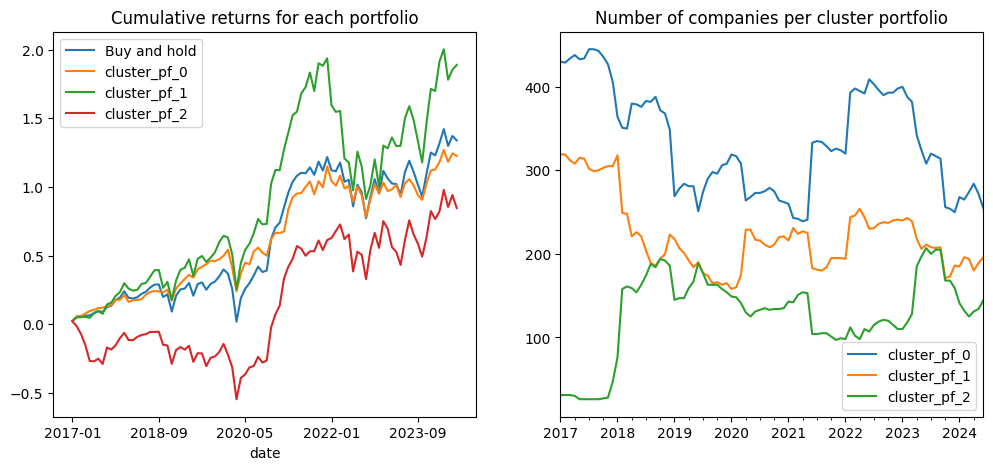

In [22]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
((1 + monthly_strategy_returns).cumprod() - 1).plot(ax = axs[0], title = "Cumulative returns for each portfolio")
n_companies.dropna().plot(ax = axs[1], title = "Number of companies per cluster portfolio")
plt.show()

In comparison to the clustering according to the loadings of principal components, we can use the average beta values of every cluster over time to better understand which type of companies are sorted into each cluster. The figure below exhibits that cluster 0 mostly includes companies with the least systematic exposure to the market and is rather neutral w.r.t size and value effects. In comparison, cluster 2 includes companies with the highest sensitivity towards market movments and companies which behave like small value stocks. 

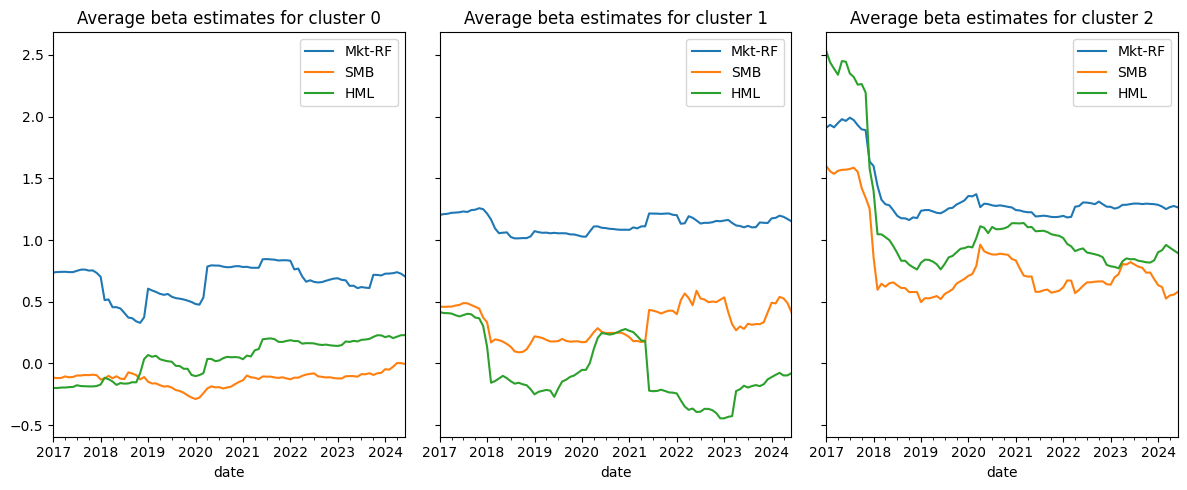

In [23]:
idx = pd.IndexSlice

fig, axs = plt.subplots(1, n_clusters, figsize = (12, 5), sharex=True, sharey=True)
for i in range(n_clusters):
    cluster = average_betas_per_cluster.loc[idx[:, i], :]
    cluster = cluster.reset_index(level = "cluster", drop = True)
    cluster.plot(ax = axs[i], title = f"Average beta estimates for cluster {i}")

fig.tight_layout()
plt.show()

Conducting Fama-French regressions for these cluster portfolios confirms this as the market beta of cluster 0 is the least and the highest for cluster 2. The regression also reveals, that the performance of each cluster portfolio can be explained by Fama-French's risk factors, as the constant is not statistically significant different from zero. 

In [24]:
ff_monthly = pd.read_csv("../data/ff_monthly.csv")
ff_monthly.index = ff_monthly.date
ff_monthly.drop(["date"], axis = 1, inplace = True)

monthly_regression_data = monthly_strategy_returns.merge(ff_monthly, left_index=True, right_index=True)
portfolios = monthly_strategy_returns.columns.tolist()

index_names = []
for name in portfolios:
    index_names.append((name, "estimates"))
    index_names.append((name, "p_value"))

parameter_estimates = pd.DataFrame(index = pd.MultiIndex.from_tuples(index_names), columns = ["alpha", "beta_m", "beta_smb", "beta_hml"])
for pf_name in portfolios:
    y = monthly_regression_data.loc[:, pf_name] - monthly_regression_data.loc[:, "rf"]
    X = monthly_regression_data.loc[:, ["Mkt-RF", "SMB", "HML"]]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit(cov_type="HAC", cov_kwds={"maxlags": 6}) 
    parameter_estimates.loc[(pf_name, "estimates")] = results.params.values
    parameter_estimates.loc[(pf_name, "p_value")] = results.pvalues.values
    
parameter_estimates.round(4)

alpha    beta_m  beta_smb  beta_hml
Buy and hold estimates  0.000923  0.996004  0.263844  0.295237
             p_value    0.301719       0.0       0.0       0.0
cluster_pf_0 estimates   0.00078  0.738491 -0.179752   0.14623
             p_value    0.635724       0.0  0.005035  0.002793
cluster_pf_1 estimates  0.000963  1.187988   0.35124 -0.034004
             p_value    0.535001       0.0       0.0  0.540548
cluster_pf_2 estimates  0.000749   1.40003  0.848084   0.95346
             p_value    0.831002       0.0       0.0       0.0

As a last analysis, we aim to improve the performance of beta clustered portfolios. From the discussion of factor based estimation of the covariance matrix, we know that portfolios with a high level of systematic diversification may be achieved by selecting companies with dissimilar beta vectors. This is why for every clustered beta portfolio we do the following.

1. For every cluster, we determine the ratio of the mean and standard deviation for companies in the cluster and select the one with the highest ratio. This company is included into the cluster specific low diversification portfolio.

2. Select the companies within this cluster with the highest dissimilarity of the beta vectors; dissimilarity is quantified by $1 - \text{cos}(\boldsymbol{\beta}_i, \boldsymbol{\beta}_j)$; if more than one company is already in the cluster specific portfolio, select the company with the highest average dissimilarity to the current companies. Repeat this process until $n_{\text{assets}}$ are included into the cluster specific portfolio.

3. Hold an equally weighted for every cluster specific portfolio for a holding period of $H$ month.

The example uses $M = 24$, $c = 3$, $H = 1$ and $n_{\text{assets}} = 10$

In [25]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

estimation_period_in_months = 24

month_starts = pd.date_range(start = "2015-01-01", end = "2024-06-01", freq = "MS")
month_ends = pd.date_range(start = "2015-01-01", end = "2024-07-01", freq = "ME")

standardize_data = True
n_clusters = 3
n_companies_pf = 10

cluster_returns = pd.DataFrame(index = study_returns.loc[month_starts[estimation_period_in_months]:, ].index, columns = [f"cluster_pf_{i}" for i in range(n_clusters)])
companies_in_pf = pd.DataFrame(index = month_starts[estimation_period_in_months:], columns = [f"cluster_pf_{i}" for i in range(n_clusters)])

for t in range(estimation_period_in_months, len(month_starts), 1):
    estimation_data = study_returns.loc[month_starts[t-estimation_period_in_months]:month_starts[t]]
    holding_data = study_returns.loc[month_starts[t]:month_ends[t]]

    na_per_ticker = estimation_data.isna().sum()
    available_tickers = na_per_ticker.index[na_per_ticker == 0].tolist()
    estimation_data = estimation_data.loc[:, available_tickers]
    holding_data = holding_data.loc[:, available_tickers]

    tickers = estimation_data.columns.tolist()
    betas_df = pd.DataFrame(columns = ["Mkt-RF", "SMB", "HML"], index = tickers)
    for ticker in tickers:
        regression_data_tmp = estimation_data.loc[:, [ticker]].merge(ff, left_index = True, right_index = True)
        y = regression_data_tmp.loc[:, ticker] - regression_data_tmp.loc[:, "rf"]
        X = regression_data_tmp.drop([ticker, "rf"], axis = 1)
        X = sm.add_constant(X)

        model = sm.OLS(y, X)
        results = model.fit()

        betas_df.loc[ticker, :] = results.params.loc[["Mkt-RF", "SMB", "HML"]].values

    cluster_scaler = StandardScaler()
    cluster_data = scaler.fit_transform(betas_df)

    if t == estimation_period_in_months:
        kmeans = KMeans(n_clusters=n_clusters, random_state = 42)
    else:
        cluster_center_init = kmeans.cluster_centers_
        kmeans = KMeans(n_clusters=n_clusters, init = cluster_center_init)

    kmeans.fit(cluster_data)

    betas_df.loc[:, "cluster_labels"] = kmeans.labels_
    n_companies_per_cluster = betas_df.cluster_labels.value_counts()
    pf_sizes = {}
    for i in range(n_clusters):
        cluster_pf_size = min(n_companies_per_cluster.loc[i], n_companies_pf)
        pf_sizes[i] = cluster_pf_size
        if cluster_pf_size < n_companies_pf:
            print(f"Number of companies in portfolio for cluster {i} from {estimation_data.index[0]} to {estimation_data.index[-1]} is {cluster_pf_size} instead of {n_companies_pf}")

        betas_df_cluster = betas_df.query(f"cluster_labels == {i}")
        cluster_companies = betas_df_cluster.index.tolist()

        pf_companies = []

        cluster_companies_returns = estimation_data.loc[:, cluster_companies]
        cluster_companies_performance = cluster_companies_returns.mean() / cluster_companies_returns.std()

        for j in range(cluster_pf_size):
            if j == 0:
                add_company = cluster_companies_performance.index[cluster_companies_performance.argmax()]
                pf_companies.append(add_company)
                current_pf_company_betas = betas_df_cluster.loc[pf_companies, :]
                remaining_cluster_companies = betas_df_cluster.drop(pf_companies)
            else:
                distances = cosine_distances(current_pf_company_betas.values[:, :3], remaining_cluster_companies.values[:, :3])
                add_company = remaining_cluster_companies.index[distances.mean(axis = 0).argmax()]

                pf_companies.append(add_company)
                current_pf_company_betas = betas_df_cluster.loc[pf_companies, :]
                remaining_cluster_companies = betas_df_cluster.drop(pf_companies)
        
        cluster_returns.loc[holding_data.index, f"cluster_pf_{i}"] = holding_data.loc[:, pf_companies].mean(axis = 1)
        companies_in_pf.loc[month_starts[t], f"cluster_pf_{i}"] = pf_companies


In comparison to the full cluster portfolios, the performance improves for reduced cluster portfolio 0 and 1 and worsens for reduced cluster portfolio 2.

In [26]:
strategy_returns = pd.concat((buy_and_hold_returns, cluster_returns), axis = 1)
strategy_returns = strategy_returns.rename({0: "Buy and hold"}, axis = 1)
strategy_returns = strategy_returns.astype(float)

monthly_strategy_returns = strategy_returns.apply(lambda x: np.log(1 + x)).resample("ME").sum()
monthly_strategy_returns = monthly_strategy_returns.apply(np.exp) - 1
monthly_strategy_returns.index = monthly_strategy_returns.index.strftime("%Y-%m")

monthly_strategy_results = pd.concat((monthly_strategy_returns.mean(), monthly_strategy_returns.std(), monthly_strategy_returns.mean() / monthly_strategy_returns.std()), axis = 1)
monthly_strategy_results.columns = ["mean", "std", "mean / std"]
monthly_strategy_results.round(4)

,mean,std,mean / std
Buy and hold,0.0110,0.0543,0.2018
cluster_pf_0,0.0119,0.0460,0.2588
cluster_pf_1,0.0200,0.0837,0.2390
cluster_pf_2,0.0025,0.1018,0.0246


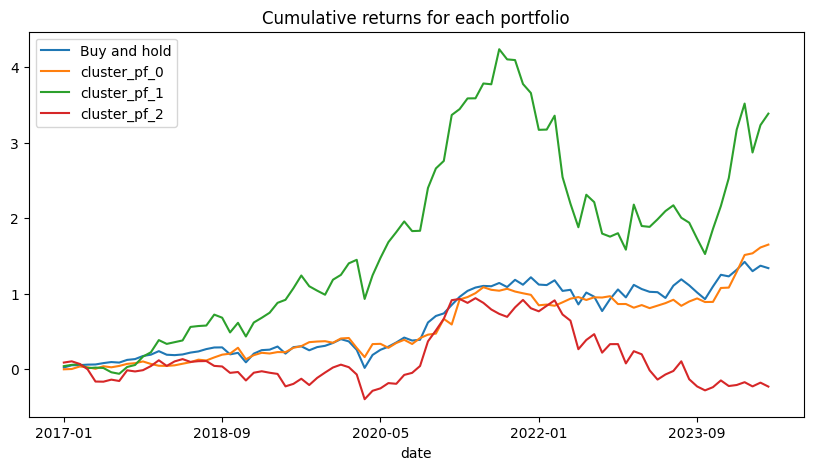

In [27]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(figsize = (10, 5))
((1 + monthly_strategy_returns).cumprod() - 1).plot(ax = axs, title = "Cumulative returns for each portfolio")
plt.show()

However, the risk adjusted performance of the reduced cluster portfolio 0 is now statistically different from zero at a significance level of 5\%. This is rather spectacular as it means that investors of this portfolio get an extra compensation for holding a less systematic risky portfolio. Such a finding might only be explained that the market participants are not aware of these systematic diversification.

In [28]:
ff_monthly = pd.read_csv("../data/ff_monthly.csv")
ff_monthly.index = ff_monthly.date
ff_monthly.drop(["date"], axis = 1, inplace = True)

monthly_regression_data = monthly_strategy_returns.merge(ff_monthly, left_index=True, right_index=True)
portfolios = monthly_strategy_returns.columns.tolist()

index_names = []
for name in portfolios:
    index_names.append((name, "estimates"))
    index_names.append((name, "p_value"))

parameter_estimates = pd.DataFrame(index = pd.MultiIndex.from_tuples(index_names), columns = ["alpha", "beta_m", "beta_smb", "beta_hml"])
for pf_name in portfolios:
    y = monthly_regression_data.loc[:, pf_name] - monthly_regression_data.loc[:, "rf"]
    X = monthly_regression_data.loc[:, ["Mkt-RF", "SMB", "HML"]]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit(cov_type="HAC", cov_kwds={"maxlags": 6}) 
    parameter_estimates.loc[(pf_name, "estimates")] = results.params.values
    parameter_estimates.loc[(pf_name, "p_value")] = results.pvalues.values
    
parameter_estimates.round(4)

alpha    beta_m  beta_smb  beta_hml
Buy and hold estimates  0.000923  0.996004  0.263844  0.295237
             p_value    0.301719       0.0       0.0       0.0
cluster_pf_0 estimates  0.008861  0.268308  0.325422  0.228994
             p_value    0.028225  0.060438  0.020132   0.04164
cluster_pf_1 estimates  0.005929  1.213557  0.653899 -0.263832
             p_value    0.268619       0.0  0.000133  0.052056
cluster_pf_2 estimates -0.005838  1.200437  1.364994  0.728607
             p_value    0.355088       0.0       0.0       0.0

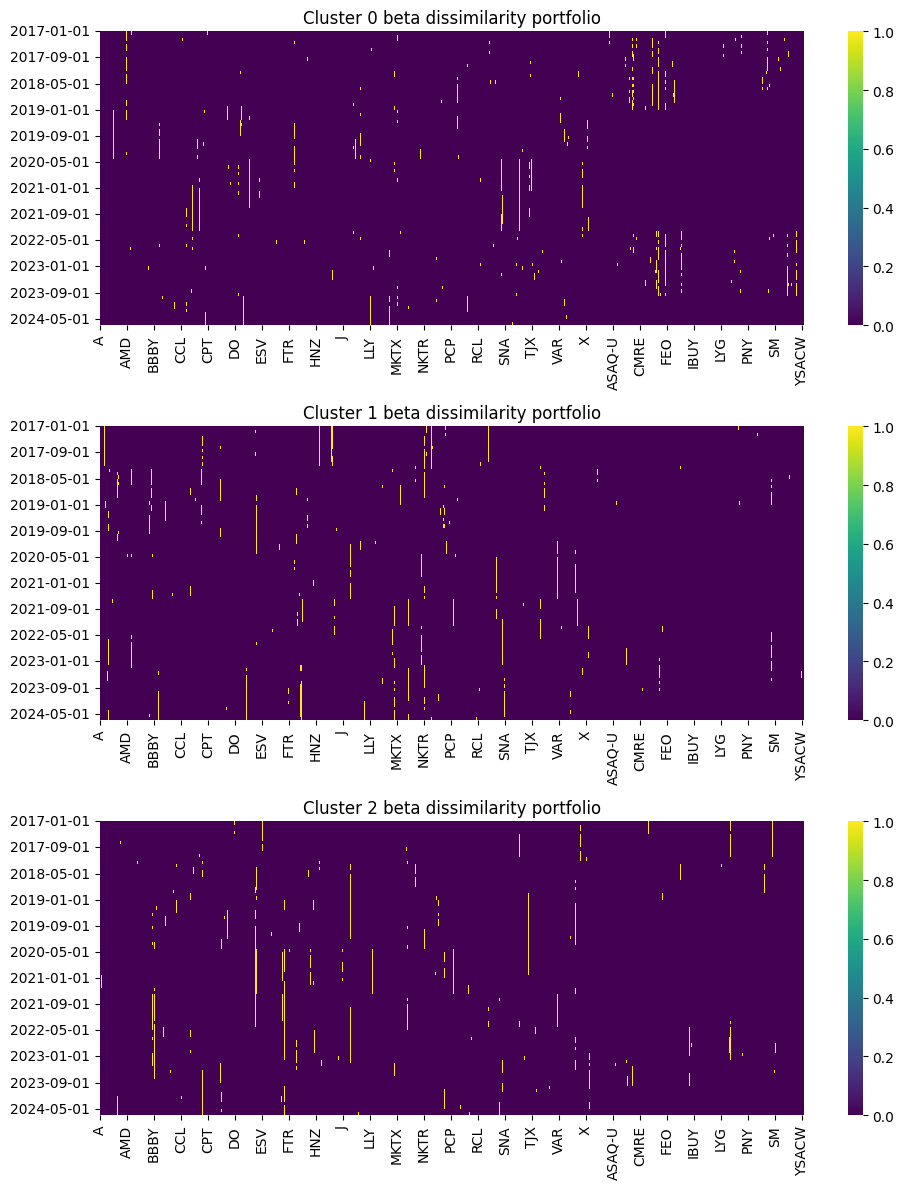

In [29]:
fig, axs = plt.subplots(n_clusters, 1, figsize = (10, n_clusters* 4))


for c in range(n_clusters):
    all_tickers = pd.DataFrame(False, index = month_starts[estimation_period_in_months:], columns = study_returns.columns.tolist())
    for idx, row in zip(companies_in_pf.index, companies_in_pf.loc[:, f"cluster_pf_{c}"]):
        all_tickers.loc[idx, row] = True

    sns.heatmap(np.where(all_tickers == True, 1, 0), cmap = "viridis", ax = axs[c])

    axs[c].set_yticks([i for i, dt in enumerate(month_starts[estimation_period_in_months:]) if i % 8 == 0])
    axs[c].set_yticklabels([dt.date() for i, dt in enumerate(month_starts[estimation_period_in_months:]) if i % 8 == 0])
    axs[c].set_xticks(x_tick_idx)
    axs[c].set_xticklabels([study_returns.columns[i] for i in x_tick_idx])
    axs[c].set_title(f"Cluster {c} beta dissimilarity portfolio")

fig.tight_layout()
plt.show()